# Practica Machine Learning

## 0. Cargar las librerías y funciones necesarias

In [1]:
# Cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Sets the value of the specified option
# Para visualizar la información de todas las filas pj dtypes o head().T aplico set_option en max_rows 
pd.set_option('display.max_rows', None)
# Para visualizar la información de la matriz de correlación
pd.set_option('display.max_columns', None)

In [2]:
# Función que realiza comprobaciones sobre una columna de un dataframe
def check_column(df, col_name):
    values_unique = len(df[col_name].unique())
    values_nan = df[col_name].isnull().sum()
    portmissing = round((df[col_name].isnull().sum()/len(df))*100, 4)
    
    print (f'{col_name} consta de: {values_unique} valores distintos de un total de {len(df)}')
    print (f'{col_name} consta de: {values_nan} valores ausentes, {portmissing}%')
    
    df[col_name].value_counts().head()

In [3]:
# Función que calcula el porcentaje de registros a filtrar
def check_filter(df, df_filtered):
    portfilter = round(((len(df) - len(df_filtered))/len(df)) *100, 4)
    print(f'Original: {df.shape}\nModificado: {df_filtered.shape}')
    print(f'{portfilter}% alojamientos filtrados')

In [4]:
# Función que cambiar el orden de una columna
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

## 1. Adquisición de datos

Esta fase es una de las fases más costosas pero desde Keepcoding nos facilitan esta tarea.

El fichero con los datos "airbnb-listings-extract.csv" se encuentra en la carpeta project.

### Cargar datos

In [5]:
# Read a dot comma-separated values (csv) file into DataFrame called df_airbnb
# pd invocar la librería de pandas con cabecera
df_airbnb = pd.read_csv('../project/airbnb-listings-extract.csv', sep=';', decimal='.')      

In [6]:
# The column labels of the DataFrame df_airbnb
df_airbnb.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [7]:
# Return the dtypes in the DataFrame df_airbnb

df_airbnb.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                         object
Host Location                     

In [8]:
# Return a tuple representing the dimensionality of the DataFrame
# df_airbnb.shape     # Df is formed by 14780 rows and 89 columns
# len(df_airbnb)
print(f'Dimensiones del dataframe df_airbnb son: {df_airbnb.shape[0]} filas y {df_airbnb.shape[1]} columnas')

Dimensiones del dataframe df_airbnb son: 14780 filas y 89 columnas


### División en training y test

Dividimos el dataframe airbnb_data en dos conjuntos, uno para training (entrenamiento) y otro para testing utizando:

    train_test_split = Split arrays or matrices into random train and test subsets con los parámetros:
      - shuffle = True   (orden aleatorio)
      - random_state = 0 (repetitibilidad de los datos) Using an int will produce the same results across different calls.
      - test_size = Represent the proportion of the dataset df_train 75% to include in the test split.


In [9]:
from sklearn.model_selection import train_test_split

# Dividimos los datos del df en entrenamiento y test (75 training, 25 test)
# random_state = repetitibidad de los datos
# shuffle by default is True --> orden aleatorio
airbnb_train, airbnb_test = train_test_split(df_airbnb, test_size=.25, shuffle=True, random_state = 0)

print(f'Datos entrenamiento: {airbnb_train.shape}')
print(f'Datos test:  {airbnb_test.shape}')

# Guardamos los conjuntos de training y testing
airbnb_train.to_csv('../project/airbnb_train.csv', sep=';', decimal='.', index=False)
airbnb_test.to_csv('../project/airbnb_test.csv', sep=';', decimal='.', index=False)


Datos entrenamiento: (11085, 89)
Datos test:  (3695, 89)


## 2. Análisis exploratorio

Se ha de tener en cuenta que todas las transformaciones que apliquemos en training se deben aplicar en test

In [10]:
# Cargamos el data frame de training y trabajamos únicamente con él

df_train = pd.read_csv('../project/airbnb_train.csv', sep=';', decimal='.')      

- Localizar variables que no aportan información para así descartarlas del dataframe

In [11]:
# Visualizamos los 5 primeros registro con la información traspuesta
df_train.head().T

,0,1,2,3,4
ID,4181571,13967638,7944109,10964641,10914226
Listing Url,https://www.airbnb.com/rooms/4181571,https://www.airbnb.com/rooms/13967638,https://www.airbnb.com/rooms/7944109,https://www.airbnb.com/rooms/10964641,https://www.airbnb.com/rooms/10914226
Scrape ID,20170315084710,20170407214119,20170407214119,20170509084238,20170407214119
Last Scraped,2017-03-15,2017-04-08,2017-04-08,2017-05-09,2017-04-08
Name,SANT BARTOMEU Apartment w/ PRIVATE PATIO - SO...,Cuarto de la luna llena,"NOMAD V, Friendly Rentals MAD",Vienna Cozy Central Park House,Madrid Studio 3C
Summary,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,"Ein absolutes Schmuckstück, direkt an der Wien...",Precioso Studio en el centro de Madrid. Cuenta...
Space,This apartment features great location in Soll...,NaN,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,NaN
Description,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,Precioso Studio en el centro de Madrid. Cuenta...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"Set in the beautiful village of Soller, the ap...",NaN,Located in the atmospheric La Latina neighborh...,You have lots of choice when it comes to place...,NaN


In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11085.0,1.025864e+07,5.558271e+06,1.986400e+04,5.545662e+06,1.125196e+07,1.530871e+07,1.858361e+07
Scrape ID,11085.0,2.017038e+13,5.437992e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11085.0,3.591538e+07,3.408308e+07,1.745300e+04,6.890142e+06,2.473200e+07,5.431096e+07,1.247534e+08
Host Response Rate,9661.0,9.481762e+01,1.519459e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11083.0,1.284887e+01,3.475103e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,11083.0,1.284887e+01,3.475103e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,11085.0,4.048828e+01,4.721665e+00,-3.785118e+01,4.040977e+01,4.041934e+01,4.043075e+01,5.595672e+01
Longitude,11085.0,-3.715292e+00,1.386820e+01,-1.224374e+02,-3.707543e+00,-3.700769e+00,-3.683986e+00,1.533714e+02
Accommodates,11085.0,3.288498e+00,2.099247e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11043.0,1.288916e+00,6.683224e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [13]:
# Weekly Price y Monthly Price son linealmente dependientes de la variable objetivo Price y 
# actuarían como predictores y el modelo no sería válido, por tanto como además tienen muchos
# valores ausentes, la opción es eliminarlos
check_column(df_train, 'Weekly Price')
check_column(df_train, 'Monthly Price')

Weekly Price consta de: 351 valores distintos de un total de 11085
Weekly Price consta de: 8392 valores ausentes, 75.7059%
Monthly Price consta de: 503 valores distintos de un total de 11085
Monthly Price consta de: 8396 valores ausentes, 75.742%


In [14]:
# Análisis de otras variables
check_column(df_train, 'Reviews per Month')

Reviews per Month consta de: 806 valores distintos de un total de 11085
Reviews per Month consta de: 2384 valores ausentes, 21.5065%


Las variables URL no aportan información de cara a la predicción del precio del airbnb:
    
    Listing Url: URL del alojamiento
    Thumbnail Url: URL miniatura
    Medium Url: URL tamaño medio
	Picture Url: Url descarga foto
	XL Picture Url: URL tamaño grande
	Host URL: URL del anfitrión o host
	Host Thumbnail Url: URL foto del host tamaño miniatura
	Host Picture  Url: URL foto del host tamaño medio

Otras variables que tampoco aportan información:

    ID: ID alojamiento
    Scrape ID: ID scrape
    Last Scraped: fecha del último scraped 
    Calendar last Scraped:
    Weekly Price: campo que podría actuar como predictor con un 75.70% de valores ausentes.
    Monthly Price: campo que podría actuar como predictor con un 75.74% de valores ausentes.
    Reviews per Month
    Geolocation: consta del par Latitude, Longitude y estos campos ya se encuentran definidos en el dataframe

Otras variables que tampoco aportan información puesto que está asociada al host o anfitrión, son las siguientes:

    Host ID: ID host  
    Host Name: nombre del anfitrión
    Host Location: localización del host
    Host About: acerca del anfitrión
    Host Neighbourhood: vecindario del anfitrión
    Host Listings Count
    Host Total Listings Count
    Calculated host listings count

In [15]:
# Columnas a eliminar porque no aportan información 

columns_1drop = ['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
                'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
                'ID', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped', 'Weekly Price', 'Monthly Price',
                'Reviews per Month', 'Geolocation', 
                'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood',
                'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']

# Drop specified labels from rows or columns
# axis: {0 or 'index', 1 or 'columns'}, default 0
# inplace: bool,  default False. If True, do operation inplace and return None 
# inplace especifica que el DataFrame se modifica en el lugar si inplace = True, 
# de lo contrario, devuelve el nuevo DataFrame con el DataFrame original sin modificar.
df_train.drop(columns_1drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

df_train.head().T

Dimensiones datos entrenamiento son: (11085, 65)


,0,1,2,3,4
Name,SANT BARTOMEU Apartment w/ PRIVATE PATIO - SO...,Cuarto de la luna llena,"NOMAD V, Friendly Rentals MAD",Vienna Cozy Central Park House,Madrid Studio 3C
Summary,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,"Ein absolutes Schmuckstück, direkt an der Wien...",Precioso Studio en el centro de Madrid. Cuenta...
Space,This apartment features great location in Soll...,NaN,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,NaN
Description,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,Precioso Studio en el centro de Madrid. Cuenta...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"Set in the beautiful village of Soller, the ap...",NaN,Located in the atmospheric La Latina neighborh...,You have lots of choice when it comes to place...,NaN
Notes,Please note that if you arrive before 4pm the ...,NaN,NaN,TECHNICAL EQUIPMENT: UPC Ultra - Highspeed Int...,NaN
Transit,Buses from the airport run regularly into the ...,NaN,"The easy access to our apartments, makes them ...",SUBWAY: U4 Stadtpark ( 1 Minute walking distan...,NaN
Access,"The living room has T shaped sofa, 2 coffee ta...",NaN,"TV, washing machine, Microwave, fully equipped...",Die Gäste haben die Möglichkeit in einem Cross...,NaN
Interaction,Our team is available on Airbnb App answering ...,NaN,"We hand over the keys at the apartment, once i...","If you have any questions, dont hesitate and c...",NaN


- Resumir toda la información posible de los datos para tener una idea de cómo son las ditribuciones de cada una de las variables. Y por otro lado, nos permitirá verificar si existen datos anómalos, también conocidos como outliers.

    - Analizar los valores ausentes o missing de cada una de las variables/columnas
    - Analizar los distintos valores de cada una de las variables/columna

In [16]:
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, 
# excluding``NaN`` values.
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9661.0,94.817617,15.194586,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,11085.0,40.488276,4.721665,-37.851182,40.409774,40.419335,40.430750,55.956716
Longitude,11085.0,-3.715292,13.868197,-122.437371,-3.707543,-3.700769,-3.683986,153.371427
Accommodates,11085.0,3.288498,2.099247,1.000000,2.000000,3.000000,4.000000,16.000000
Bathrooms,11043.0,1.288916,0.668322,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11065.0,1.348305,0.907391,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11050.0,2.052489,1.630873,1.000000,1.000000,2.000000,2.000000,16.000000
Square Feet,446.0,401.845291,677.080216,0.000000,0.000000,90.000000,646.000000,6997.000000
Price,11071.0,74.194111,72.357472,9.000000,34.000000,56.000000,88.000000,969.000000
Security Deposit,4758.0,188.833123,115.486262,0.000000,100.000000,150.000000,200.000000,990.000000


Con la columna count (proporciona el número de observaciones que no son NA) del comando describe, observamos que algunas de estas variables numéricas tienen bastantes valores ausentes, entre las que destacan Host Acceptance Rate, Square Feet, Has Availability, License y Jurisdiction Names.

    Un primer paso será evaluar los valores ausentes de cada una de las columnas del dataframe
    Un segundo paso será evaluar los diferentes valores de cada una de las columnas del dataframe
    Un tercer paso es analizar algunas variables con values_counts() =Return a Series containing counts of unique values.

In [17]:
# Detect missing values en Pandas (isnull or isna )
# Count the Null Columns
null_columns = df_train.columns[df_train.isnull().any()]
df_train[null_columns].isnull().sum() # es equivalente airbnb_train.isna().sum()

Name                                1
Summary                           447
Space                            2906
Description                         6
Neighborhood Overview            4222
Notes                            6831
Transit                          4290
Access                           4833
Interaction                      4901
House Rules                      3883
Host Since                          2
Host Response Time               1424
Host Response Rate               1424
Host Acceptance Rate            11057
Host Verifications                  4
Neighbourhood                    3903
Neighbourhood Group Cleansed      768
City                                4
State                             113
Zipcode                           376
Market                             43
Country                             1
Bathrooms                          42
Bedrooms                           20
Beds                               35
Amenities                         134
Square Feet 

Se analiza el total de valores perdidos (NaN =Not a Number) en cada variable o columna,  y se calcula el % de manera que si el nº es muy elevado se hace un drop de dichas columnas porque no son estadísticamente significativas.
    
    Las columnas con las cifras más altas (mayor nº de valores ausentes) son:

    Host Acceptance Rate 
    Square Feet
    Has Availability
    License
    Jurisdiction Names
    

In [18]:
# Check de dichas columnas
check_column(df_train, 'Host Acceptance Rate')
check_column(df_train, 'Square Feet')
check_column(df_train, 'Has Availability')
check_column(df_train, 'License')
check_column(df_train, 'Jurisdiction Names')

Host Acceptance Rate consta de: 11 valores distintos de un total de 11085
Host Acceptance Rate consta de: 11057 valores ausentes, 99.7474%
Square Feet consta de: 89 valores distintos de un total de 11085
Square Feet consta de: 10639 valores ausentes, 95.9765%
Has Availability consta de: 2 valores distintos de un total de 11085
Has Availability consta de: 11078 valores ausentes, 99.9369%
License consta de: 247 valores distintos de un total de 11085
License consta de: 10817 valores ausentes, 97.5823%
Jurisdiction Names consta de: 12 valores distintos de un total de 11085
Jurisdiction Names consta de: 10927 valores ausentes, 98.5747%


In [19]:
# Columnas a eliminar porque tiene un porcentaje superior al 90% de valores perdidos
columns_2drop = ['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names']

# Drop specified labels from columns
df_train.drop(columns_2drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (11085, 60)


In [20]:
# Analizar los distintos valores de cada una de las columnas o variables
df_train.apply(lambda x: len(x.unique()))

Name                            10814
Summary                         10023
Space                            7706
Description                     10743
Experiences Offered                 5
Neighborhood Overview            6063
Notes                            3596
Transit                          5976
Access                           5435
Interaction                      5055
House Rules                      6110
Host Since                       2022
Host Response Time                  5
Host Response Rate                 68
Host Verifications                187
Street                           1386
Neighbourhood                     336
Neighbourhood Cleansed            431
Neighbourhood Group Cleansed       46
City                              215
State                              90
Zipcode                           512
Market                             42
Smart Location                    223
Country Code                       18
Country                            18
Latitude    

Estudiamos más a fondo las variables:
    
    Street                           
    Neighbourhood                      
    City                              
    State                              
    Zipcode                           
    Market                            
    Smart Location                    
    Country Code                       
    Country                            

In [21]:
# Variable Street formada por Neighbourhood, City, State, Zipcode y Country
check_column(df_train, 'Street')
df_train['Street'].value_counts().head()

Street consta de: 1386 valores distintos de un total de 11085
Street consta de: 0 valores ausentes, 0.0%


Embajadores, Madrid, Comunidad de Madrid 28012, Spain    444
Madrid, Comunidad de Madrid 28012, Spain                 399
Madrid, Comunidad de Madrid 28004, Spain                 366
Malasaña, Madrid, Comunidad de Madrid 28004, Spain       352
La Latina, Madrid, Comunidad de Madrid 28005, Spain      350
Name: Street, dtype: int64

In [22]:
# Variable Neighbourhood 
check_column(df_train, 'Neighbourhood')
df_train['Neighbourhood'].value_counts().head()

Neighbourhood consta de: 336 valores distintos de un total de 11085
Neighbourhood consta de: 3903 valores ausentes, 35.2097%


Malasaña       653
La Latina      617
Embajadores    587
Sol            549
Cortes         440
Name: Neighbourhood, dtype: int64

In [23]:
# Variable City observamos registros distintos a Madrid, por lo tanto será necesario realizar un filtrado
check_column(df_train, 'City')
df_train['City'].value_counts().head()

City consta de: 215 valores distintos de un total de 11085
City consta de: 4 valores ausentes, 0.0361%


Madrid       9900
Barcelona     225
London        102
Paris          80
马德里            42
Name: City, dtype: int64

In [24]:
# Variable State observamos registros distintos a Madrid 
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'State')
df_train['State'].value_counts().head()

State consta de: 90 valores distintos de un total de 11085
State consta de: 113 valores ausentes, 1.0194%


Comunidad de Madrid    7968
Community of Madrid    1398
Madrid                  517
Catalunya               147
Balearic Islands        133
Name: State, dtype: int64

In [25]:
# Variable Zipcode observamos registros distintos a Madrid 
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'Zipcode')
df_train['Zipcode'].value_counts().head()

Zipcode consta de: 512 valores distintos de un total de 11085
Zipcode consta de: 376 valores ausentes, 3.392%


28012    1550
28004    1351
28005     928
28013     761
28014     479
Name: Zipcode, dtype: int64

In [26]:
# Variable Market observamos registros distintos a Madrid
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'Market')
df_train['Market'].value_counts().head()

Market consta de: 42 valores distintos de un total de 11085
Market consta de: 43 valores ausentes, 0.3879%


Madrid             9951
Mallorca Island     283
Barcelona           225
London              109
Paris                83
Name: Market, dtype: int64

In [27]:
# Variable Smart Location está formada por  City y Country
# Esta variable o columna se puede eliminar pq su información está embebida en la columna City
check_column(df_train, 'Smart Location')
df_train['Smart Location'].value_counts().head()

Smart Location consta de: 223 valores distintos de un total de 11085
Smart Location consta de: 0 valores ausentes, 0.0%


Madrid, Spain             9894
Barcelona, Spain           223
London, United Kingdom      99
Paris, France               80
马德里, Spain                  42
Name: Smart Location, dtype: int64

In [28]:
# Variable Country corresponde al País 
# Esta variable o columna se puede eliminar pq su información está embebida en la columna Country Code
check_column(df_train, 'Country')
df_train['Country'].value_counts().head()

Country consta de: 18 valores distintos de un total de 11085
Country consta de: 1 valores ausentes, 0.009%


Spain             10505
United States       125
United Kingdom      122
France               82
Italy                58
Name: Country, dtype: int64

In [29]:
# Variable Country Code corresponde al Código del País 
check_column(df_train, 'Country Code')
df_train['Country Code'].value_counts().head()

Country Code consta de: 18 valores distintos de un total de 11085
Country Code consta de: 0 valores ausentes, 0.0%


ES    10505
US      125
GB      122
FR       82
IT       58
Name: Country Code, dtype: int64

Por lo tanto decidimos:

    - Eliminar la variable Street que está formada por la concatenación de Neighbourhood + City + State + Zipcode + Country 
    - Eliminar la variable State porque la información la podemos obtener de la variable City
    - Eliminar la variable Zipcode con los códigos postales porque trabajamos con la variable City
    - Eliminar la variable Market porque la información la podemos obtener de la variable City
    - Eliminar la variable Smart Location = City + Country pq se puede extraer de la variable City y Country Code
    - Eliminar la variable Country porque se puede extraer la información de la variable Country Code
    - Mantener las variables City, Neighbourhood y Country Code

In [30]:
# Columnas a eliminar porque la información la podemos obtener de las variables Neighbourdhood, City y County Code
columns_3drop = ['Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country']

# Drop specified labels from columns
df_train.drop(columns_3drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (11085, 54)


In [31]:
df_train.head().T

,0,1,2,3,4
Name,SANT BARTOMEU Apartment w/ PRIVATE PATIO - SO...,Cuarto de la luna llena,"NOMAD V, Friendly Rentals MAD",Vienna Cozy Central Park House,Madrid Studio 3C
Summary,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,"Ein absolutes Schmuckstück, direkt an der Wien...",Precioso Studio en el centro de Madrid. Cuenta...
Space,This apartment features great location in Soll...,NaN,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,NaN
Description,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,Precioso Studio en el centro de Madrid. Cuenta...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,"Set in the beautiful village of Soller, the ap...",NaN,Located in the atmospheric La Latina neighborh...,You have lots of choice when it comes to place...,NaN
Notes,Please note that if you arrive before 4pm the ...,NaN,NaN,TECHNICAL EQUIPMENT: UPC Ultra - Highspeed Int...,NaN
Transit,Buses from the airport run regularly into the ...,NaN,"The easy access to our apartments, makes them ...",SUBWAY: U4 Stadtpark ( 1 Minute walking distan...,NaN
Access,"The living room has T shaped sofa, 2 coffee ta...",NaN,"TV, washing machine, Microwave, fully equipped...",Die Gäste haben die Möglichkeit in einem Cross...,NaN
Interaction,Our team is available on Airbnb App answering ...,NaN,"We hand over the keys at the apartment, once i...","If you have any questions, dont hesitate and c...",NaN


- Para un mejor entendimiento de los datos, es aconsejable hacer representaciones gráficas, como histogramas, boxplots o scatter plots

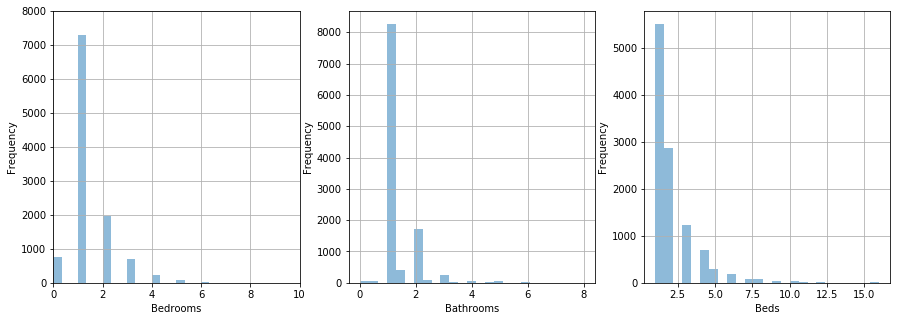

In [32]:
# Draw one histogram of the DataFrame's columns: Bedrooms, Bathrooms, Number of Reviews
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df_train['Bedrooms'].plot.hist(alpha=0.5, bins=30, grid = True)
plt.axis([0, 10, 0, 8000])
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
df_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,3,3)
df_train['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.show()


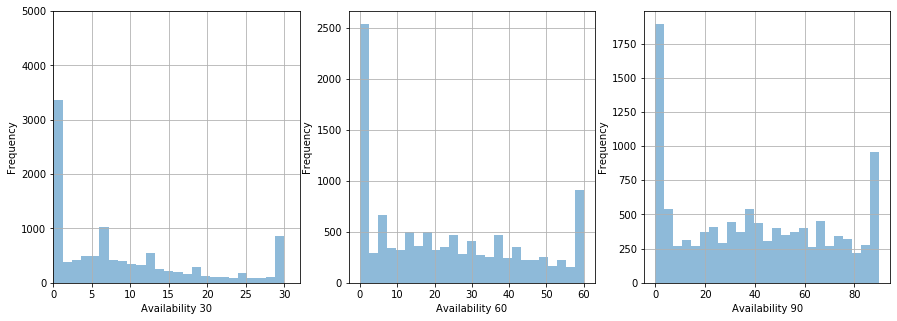

In [33]:
# Draw one histogram of the DataFrame's columns: Availability 30, Availability 60 y Availability 90
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df_train['Availability 30'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 32, 0, 5000])
plt.xlabel('Availability 30')

plt.subplot(1,3,2)
df_train['Availability 60'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 60')

plt.subplot(1,3,3)
df_train['Availability 90'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 90')

plt.show()


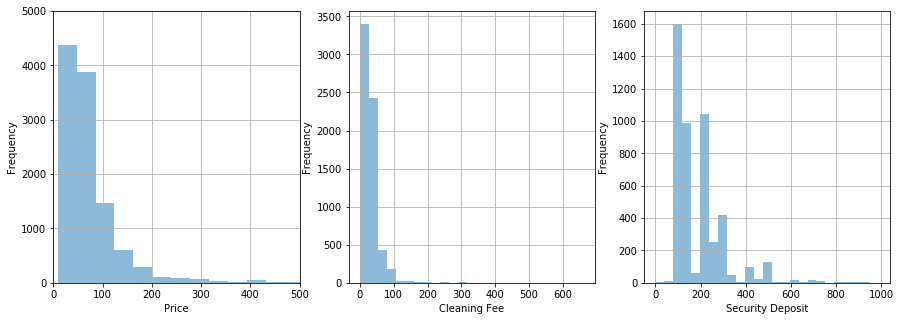

In [34]:
# Draw one histogram of the DataFrame's columns: Price, Cleaning Fee and Security Deposit
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df_train['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 500, 0, 5000])
plt.xlabel('Price')

plt.subplot(1,3,2)
df_train['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Cleaning Fee')

plt.subplot(1,3,3)
df_train['Security Deposit'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Security Deposit')

plt.show()

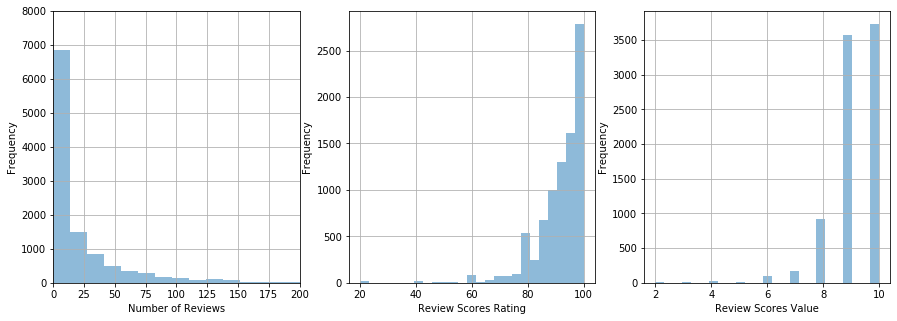

In [35]:
# Draw one histogram of the DataFrame's columns: Number of  Reviews, Review Scores Rating and Review Scores Value
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df_train['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 200, 0, 8000])
plt.xlabel('Number of Reviews')

plt.subplot(1,3,2)
df_train['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Rating')

plt.subplot(1,3,3)
df_train['Review Scores Value'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Value')

plt.show()

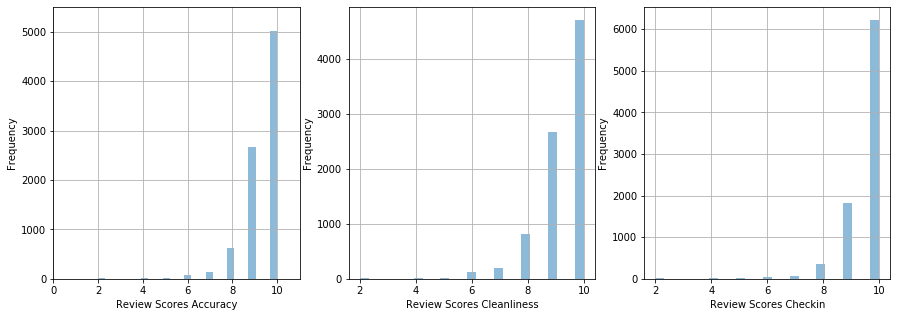

In [36]:
# Draw one histogram of the DataFrame's columns: Review Scores Rating, Review Scores Accuracy  y Review Scores Cleanliness
plt.figure(figsize=(15, 5)), 

plt.subplot(1,3,1)
df_train['Review Scores Accuracy'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.axis([0, 11, 0, 5500])
plt.xlabel('Review Scores Accuracy')

plt.subplot(1,3,2)
df_train['Review Scores Cleanliness'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Cleanliness')

plt.subplot(1,3,3)
df_train['Review Scores Checkin'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Review Scores Checkin')

plt.show()


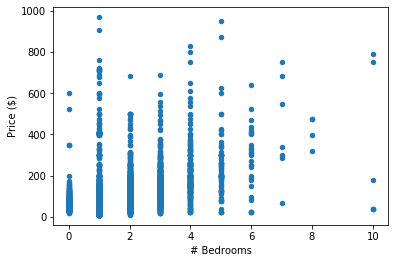

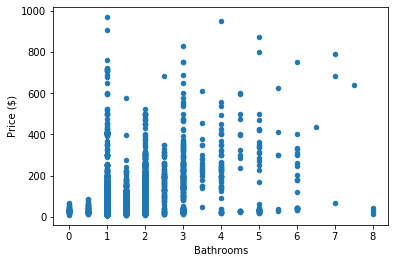

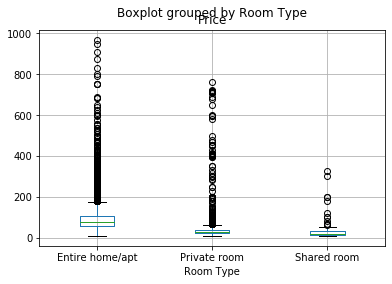

In [37]:
# Representamos 3: Bedrooms, Bathrooms y Room Type
# el resto se puede repetir una a una

df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.show()

df_train.boxplot(by='Room Type',column = 'Price')
plt.show()

In [38]:
# Variable Room Type
check_column(df_train, 'Room Type')
# Return a Series containing counts of unique values.
df_train['Room Type'].value_counts()

Room Type consta de: 3 valores distintos de un total de 11085
Room Type consta de: 0 valores ausentes, 0.0%


Entire home/apt    6778
Private room       4152
Shared room         155
Name: Room Type, dtype: int64

### Aplicar filtros

Filtro de alojamientos en Madrid

    Analizamos las variables Country Code y City 

In [39]:
# Analizamos la variable Country Code
df_train['Country Code'].value_counts()

ES    10505
US      125
GB      122
FR       82
IT       58
AU       36
IE       31
DE       31
AT       26
NL       16
CA       15
BE       14
DK       13
CH        4
GR        3
HK        2
It        1
CU        1
Name: Country Code, dtype: int64

In [40]:
# Analizamos la variable City
df_train['City'].value_counts()

Madrid                                 9900
Barcelona                               225
London                                  102
Paris                                    80
马德里                                      42
Palma                                    39
Alcúdia                                  31
Roma                                     31
Berlin                                   30
Dublin                                   26
New York                                 24
Los Angeles                              23
Wien                                     20
Brooklyn                                 20
Amsterdam                                16
Rome                                     15
Toronto                                  13
Madrid, Comunidad de Madrid, ES          12
Inca                                     12
Palma de Mallorca                        10
Pollença                                 10
Washington                                8
San Francisco                   

In [41]:
# Filtro City  
list_of_madrid = ['Madrid', 'Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'las matas  madrid', 
                  'Boadilla del Monte', 'Delicias-Madrid', 'Delicias', 'Aravaca (Madrid)', 
                  'Chueca, Madrid', 'Madrid, Comunidad de Madrid, ESPANA']

df_train_filtered = df_train[df_train['City'].isin(list_of_madrid)]

# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (11085, 54)
Modificado: (9927, 54)
10.4465% alojamientos filtrados


Aunque el porcentaje de alojamientos fuera de Madrid es elevado (10.4465%), optamos por aplicar el filtro para trabajar exclusivamente con registros ubicados en Madrid, y el resto de alojamientos con ubicaciones distintas de Madrid, los consideramos outliers.

In [42]:
df_train = df_train[df_train['City'].isin(list_of_madrid)]
print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9927, 54)


Otros filtros

    Analizamos las variables Bedrooms y Bathrooms

In [43]:
# Extraer valores en Pandas de la columna Bedrooms 
df_train['Bedrooms'].value_counts()

1.0     6670
2.0     1754
0.0      705
3.0      561
4.0      148
5.0       47
6.0       12
10.0       5
7.0        4
8.0        3
Name: Bedrooms, dtype: int64

In [44]:
# Extraer valores en Pandas de la columna Bathrooms 
df_train['Bathrooms'].value_counts()

1.0    7524
2.0    1552
1.5     346
3.0     179
2.5      75
0.0      49
0.5      47
5.0      37
4.0      27
6.0      18
4.5      15
3.5      13
5.5       3
8.0       3
7.0       1
Name: Bathrooms, dtype: int64

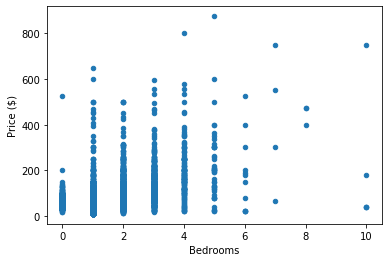

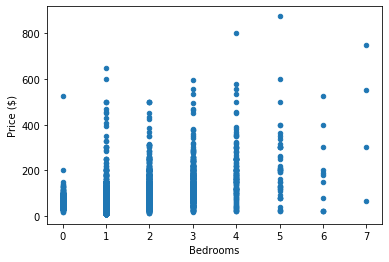

In [45]:
# Filter Bedrooms
filter_bedrooms = df_train['Bedrooms'] <= 7
df_train_filtered = df_train[filter_bedrooms]

df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.show()

df_train_filtered.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.show()

In [46]:
# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (9927, 54)
Modificado: (9901, 54)
0.2619% alojamientos filtrados


In [47]:
# Aplicamos el filtro para Bedrooms
# df_train = df_train[filter_bedrooms]

# print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

El precio según el nº de Bedrooms es ascendente hasta 4 habitaciones y después a partir de 5 habitaciones el precio disminuye, esto podría ser debido a que son pisos con menos metros cuadrados puesto que sus habitaciones son más pequeñas que los alojamientos con menos Bedrooms.

In [48]:
# Filter Bathrooms 
filter_bathrooms = df_train['Bathrooms'] <= 7
df_train_filtered = df_train[filter_bathrooms]

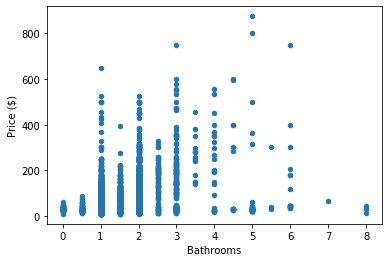

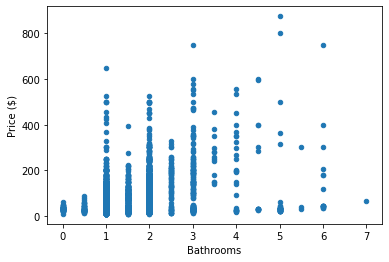

In [49]:
df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.show()

df_train_filtered.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.show()

El precio según los Baños tiene un comportamiento similar al anterior (Precio según Bedrooms)

In [50]:
# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (9927, 54)
Modificado: (9886, 54)
0.413% alojamientos filtrados


In [ ]:
# Aplicamos el filtro para Bedrooms
# df_train = df_train[filter_bathrooms]

# print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Con el min del comando describe observamos que existen variables como Bathrooms y Bedrooms con valores a 0. 
Como la cifra de alojamientos con Bedrooms a 0 es elevada asumimos que existen alojamientos 
sin habitaciones pudiendo hacer uso del sofa, entonces únicamente optamos por filtrar únicamente 
los alojamientos con Bathrooms a 0

In [51]:
# Alojamientos con 0  Bedrooms
len(df_train[df_train['Bedrooms'] == 0])

705

In [52]:
# Alojamientos con 0  Bathrooms
len(df_train[df_train['Bathrooms'] == 0])

49

In [53]:
# Filter Bathrooms 
filter_bath0 = df_train['Bathrooms']!= 0
df_train_filtered = df_train[filter_bath0]

# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (9927, 54)
Modificado: (9878, 54)
0.4936% alojamientos filtrados


In [ ]:
# Aplicamos el filtro para Bathrooms
# df_train = df_train[filter_bath0]

# print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

In [54]:
# Aplicamos al dataframe el filtro con la combinación de Bedrooms <= 7 y Bathrooms <= 7 y != 0
# len(df_train[(df_train['Bedrooms']<=7)&(df_train['Bathrooms']<=7)&(df_train['Bathrooms']!=0)])
df_train_filtered = df_train[(df_train['Bedrooms']<=7)&(df_train['Bathrooms']<=7)&(df_train['Bathrooms']!=0)]

# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (9927, 54)
Modificado: (9812, 54)
1.1585% alojamientos filtrados


In [55]:
# Aplicamos el filtro
df_train = df_train_filtered

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9812, 54)


Analizamos la variable objetivo Price, con valor mínimo de 10 y max de 875. Como hay un 1.34% de alojamientos cuyo precio excede de 250, fijamos en dicho valor el umbral para considerar outliers, aquellos alojamentos cuyo precio excede de dicho umbral.

In [56]:
# Analizamos la variable Price
df_train['Price'].describe()

count    9805.000000
mean       66.335441
std        55.451972
min        10.000000
25%        32.000000
50%        54.000000
75%        80.000000
max       875.000000
Name: Price, dtype: float64

In [57]:
# Filter Price 
filter_price = df_train['Price'] <= 250
df_train_filtered = df_train[filter_price]

# Chequeo del filtro
check_filter(df_train, df_train_filtered)

Original: (9812, 54)
Modificado: (9680, 54)
1.3453% alojamientos filtrados


In [58]:
# Aplicamos el filtro para Price
df_train = df_train[filter_price]

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9680, 54)


-  Evaluar las correlaciones entre las diferente variables para identificar posibles atributos o variables que estén altamente correlacionados, con valores cercanos a 1 o -1.  

In [59]:
# Matriz de correlación
df_train.corr() 

,Host Response Rate,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
Host Response Rate,1.000000,-0.038452,-0.033202,0.071186,-0.047835,0.016394,0.041075,0.016324,-0.035953,0.014804,0.075996,0.055017,0.012085,0.001345,-0.137063,-0.112205,-0.098639,-0.023577,0.135301,0.094357,0.081884,0.103012,0.103048,0.096662,0.067851,0.093397
Latitude,-0.038452,1.000000,0.248753,0.002656,0.036833,0.028619,0.022892,0.077171,0.077080,0.121891,-0.006292,0.014124,-0.008577,0.004707,0.046841,0.046694,0.040775,0.026513,-0.058082,-0.006172,0.000206,-0.012917,0.004423,-0.002565,0.054481,-0.015411
Longitude,-0.033202,0.248753,1.000000,-0.054789,0.000540,0.008858,-0.022949,-0.038689,0.031306,0.004175,-0.026551,-0.018925,-0.007957,-0.003672,0.056906,0.054940,0.052909,0.003550,-0.035163,0.026707,0.032083,0.034132,0.016130,0.018371,-0.092976,0.021822
Accommodates,0.071186,0.002656,-0.054789,1.000000,0.253950,0.657900,0.815733,0.625244,0.129338,0.366515,0.579902,0.295723,-0.002583,0.000831,-0.073789,-0.064994,-0.070493,0.083238,0.098585,-0.060351,-0.055305,-0.020487,-0.064647,-0.046728,0.032291,-0.061991
Bathrooms,-0.047835,0.036833,0.000540,0.253950,1.000000,0.355580,0.308013,0.241896,0.136413,0.238488,0.157683,0.093526,0.015381,-0.004556,-0.038451,-0.048896,-0.044401,-0.005804,-0.052540,-0.000729,0.003876,-0.007247,-0.043840,-0.045040,0.036792,-0.002454
Bedrooms,0.016394,0.028619,0.008858,0.657900,0.355580,1.000000,0.657621,0.513164,0.171304,0.338263,0.422620,0.156982,0.002804,-0.000088,-0.040720,-0.047810,-0.055272,0.015880,-0.015780,0.012417,0.006645,0.007293,-0.009097,0.007493,-0.011159,-0.003434
Beds,0.041075,0.022892,-0.022949,0.815733,0.308013,0.657621,1.000000,0.480645,0.134957,0.317680,0.456232,0.234453,-0.008825,0.000612,-0.010624,-0.011008,-0.019003,0.089964,0.052166,-0.053075,-0.063956,-0.022423,-0.052426,-0.034912,-0.012854,-0.051186
Price,0.016324,0.077171,-0.038689,0.625244,0.241896,0.513164,0.480645,1.000000,0.333671,0.625748,0.431816,0.141446,0.008659,0.003313,-0.040916,-0.047339,-0.059066,0.075182,-0.005703,0.065668,0.070660,0.094541,-0.007385,0.015453,0.164743,0.027185
Security Deposit,-0.035953,0.077080,0.031306,0.129338,0.136413,0.171304,0.134957,0.333671,1.000000,0.467805,0.039503,0.007213,0.149943,0.004329,-0.012112,-0.020398,-0.014839,0.045752,-0.124065,0.070858,0.069500,0.063095,0.025621,0.017196,0.041677,0.029531
Cleaning Fee,0.014804,0.121891,0.004175,0.366515,0.238488,0.338263,0.317680,0.625748,0.467805,1.000000,0.240392,0.080767,0.066204,-0.003033,-0.033434,-0.039389,-0.046013,0.102846,-0.076845,-0.000105,0.008267,0.055001,-0.074622,-0.038455,0.063384,-0.036545


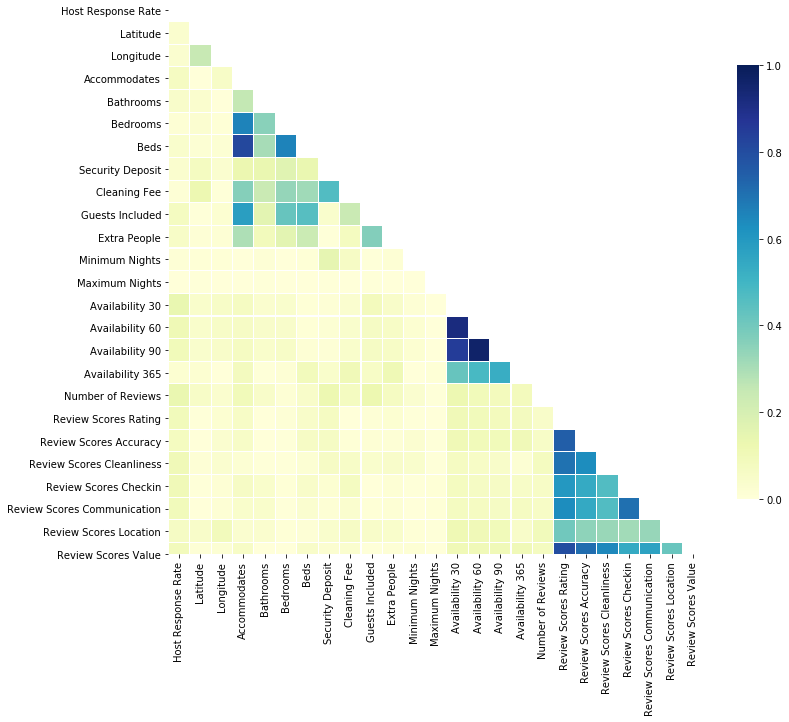

In [60]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


Con respecto a esta información, observamos que las siguientes variables tienen correlaciones por encima de 0.7

    Beds con Accommodates un 0.837597
    Availability 30 con Availability 60, un 0.922891 y con Availability 90, un 0.851165
    Availability 60 con Availability 90, un 0.963320  
    Review Scores Rating con Review Scores Accuracy, un 0.752577, con Review Scores Value, un 0.795429 
    y con Review Scores Cleanliness con un 0.701759
    Review Scores Accuracy con Review Scores Value con un 0.710949
    Review Scores Checkin con Review Scores Communication con un 0.706694 

Entonces las decisiones a las que llegamos son:

    - Eliminar Accommodates por estar altamente correlacionada con Beds
    - Eliminar Availability 30, Availability 60 y Availability 90 pq están correlacionadas entre si.
    - Mantener la variable Availability 365  (The number of days for which a particular host is available in a year)
    - Eliminar Review Scores Accuracy, Review Scores Cleanliness, Review Scores Checkin, Review Scores Communication y Review Scores Location  pq están correlacionadas entre sí. 
    - Crear la variable Review Scores Mean con la media de las columnas Review Scores XXX para después eliminarlas 

In [61]:
# Dataframe con las columnas desde Review Scores Rating hasta Review Scores Value 
# para generar una nueva característica con la media de todas ellas
df_review = df_train.loc[:,'Review Scores Rating':'Review Scores Value']

df_train['Review Scores Mean'] = df_review.mean(axis=1)

# Columnas a eliminar porque una alta correlación y esto origina valores redundantes
columns_4drop = ['Accommodates', 'Availability 30', 'Availability 60', 'Availability 90',
                'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                'Review Scores Communication', 'Review Scores Location', 
                'Review Scores Rating', 'Review Scores Value']

# Drop specified labels from columns
df_train.drop(columns_4drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9680, 44)


Generación de nuevas características a partir de las existentes

In [62]:
# Check Host Since
check_column(df_train, 'Host Since')
#nan_hostsince = df_train['Host Since'].isnull().sum()
#print(f'Exactamente Host Since consta de {nan_hostsince} valores ausentes')


Host Since consta de: 1955 valores distintos de un total de 9680
Host Since consta de: 2 valores ausentes, 0.0207%


In [63]:
# Eliminamos los 2 registros ausentes de la variable Host Since
df_train.dropna(subset=['Host Since'], inplace=True)
print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9678, 44)


In [64]:
# Check Last Review
check_column(df_train, 'Last Review')

Last Review consta de: 638 valores distintos de un total de 9678
Last Review consta de: 1947 valores ausentes, 20.1178%


In [65]:
# Sustituimos los valores ausentes por la fecha incluida en 'Host Since'
df_train['Last Review'].fillna(df_train['Host Since'], inplace=True)

check_column(df_train, 'Last Review')

Last Review consta de: 1178 valores distintos de un total de 9678
Last Review consta de: 0 valores ausentes, 0.0%


In [66]:
from datetime import datetime

# Añadimos nuevas variables

# Transformamos la columna Host Since de object a datetime y creamos la variable Years HostSince que son los años desde
# que el Host publico en airbnb hasta el año actual 2020
df_train['Host Since']      = df_train['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_train['Years HostSince'] = df_train['Host Since'].apply(lambda x: 2020 - x.year)

# Creamos las variables Año y Mes del último review
df_train['Last Review']      = df_train['Last Review'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_train['Year LastReview']  = df_train['Last Review'].apply(lambda x: x.year)
df_train['Month LastReview'] = df_train['Last Review'].apply(lambda x: x.month)

In [67]:
# Columnas Host Since y Last Review a eliminar y decidimos eliminar la variable First Review
columns_5drop = ['Host Since', 'Last Review', 'First Review']

# Drop specified labels from columns
df_train.drop(columns_5drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9678, 44)


In [68]:
df_train.head().T

,1,2,4,5,6
Name,Cuarto de la luna llena,"NOMAD V, Friendly Rentals MAD",Madrid Studio 3C,Habitación Individual con baño compartido,"Habitación Privada, Tranquila y Luminosa"
Summary,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,Precioso Studio en el centro de Madrid. Cuenta...,"Habitación individual totalmente equipada, con...",Nuestro piso esta a 300 mts de la estación Col...
Space,NaN,This comfortable modern apartment is in a full...,NaN,"Estamos situados en el corazón de Madrid, rode...",A 100 metros de Casa de Campo y a menos de 50 ...
Description,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,Precioso Studio en el centro de Madrid. Cuenta...,"Habitación individual totalmente equipada, con...",Nuestro piso esta a 300 mts de la estación Col...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,NaN,Located in the atmospheric La Latina neighborh...,NaN,NaN,Es un vecindario residencial y tranquilo con t...
Notes,NaN,NaN,NaN,NaN,NaN
Transit,NaN,"The easy access to our apartments, makes them ...",NaN,A tan solo 1 minuto andando esta la estación d...,Tenemos muy cerca la estacion de metro colonia...
Access,NaN,"TV, washing machine, Microwave, fully equipped...",NaN,Los baños son compartidos,Puedes hacer uso del recibo en donde tambien h...
Interaction,NaN,"We hand over the keys at the apartment, once i...",NaN,A la llegada se les da un plano de la ciudad y...,Todos los días al regresar del trabajo podemos...


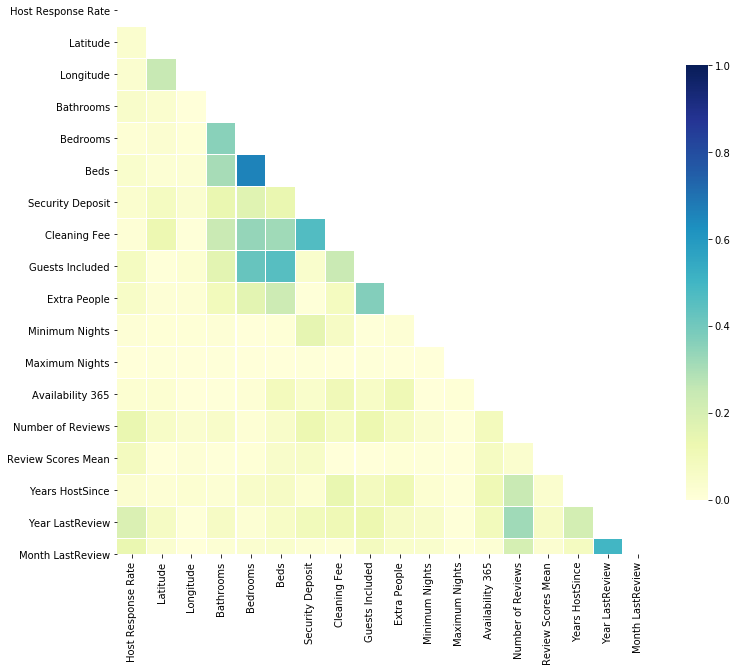

In [69]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [70]:
# Matriz de correlación
df_train.corr() 

,Host Response Rate,Latitude,Longitude,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Review Scores Mean,Years HostSince,Year LastReview,Month LastReview
Host Response Rate,1.000000,-0.038452,-0.033202,-0.047835,0.016394,0.041075,0.016324,-0.035953,0.014804,0.075996,0.055017,0.012085,0.001345,-0.023577,0.135301,0.085638,0.030931,0.189456,-0.136076
Latitude,-0.038452,1.000000,0.249009,0.036821,0.028609,0.022870,0.077213,0.077080,0.121891,-0.006314,0.014097,-0.008584,0.004708,0.026459,-0.058116,0.003184,0.018732,-0.068552,0.032480
Longitude,-0.033202,0.249009,1.000000,0.000575,0.008886,-0.022899,-0.038672,0.031306,0.004175,-0.026511,-0.018869,-0.007946,-0.003673,0.003678,-0.035119,0.011877,-0.026475,0.005767,-0.000475
Bathrooms,-0.047835,0.036821,0.000575,1.000000,0.355560,0.307972,0.241846,0.136413,0.238488,0.157642,0.093466,0.015368,-0.004555,-0.005952,-0.052598,0.004931,0.020152,-0.064200,-0.023271
Bedrooms,0.016394,0.028609,0.008886,0.355560,1.000000,0.657611,0.513149,0.171304,0.338263,0.422599,0.156939,0.002794,-0.000087,0.015768,-0.015825,0.008492,0.051676,0.022043,-0.033881
Beds,0.041075,0.022870,-0.022899,0.307972,0.657611,1.000000,0.480592,0.134957,0.317680,0.456191,0.234375,-0.008846,0.000614,0.089769,0.052086,-0.049938,0.065218,0.061990,-0.041926
Price,0.016324,0.077213,-0.038672,0.241846,0.513149,0.480592,1.000000,0.333671,0.625748,0.431771,0.141343,0.008636,0.003316,0.074945,-0.005803,0.041733,0.112459,-0.021385,-0.024645
Security Deposit,-0.035953,0.077080,0.031306,0.136413,0.171304,0.134957,0.333671,1.000000,0.467805,0.039503,0.007213,0.149943,0.004329,0.045752,-0.124065,0.056021,0.023541,-0.094885,0.019914
Cleaning Fee,0.014804,0.121891,0.004175,0.238488,0.338263,0.317680,0.625748,0.467805,1.000000,0.240392,0.080767,0.066204,-0.003033,0.102846,-0.076845,-0.002493,0.139827,-0.113146,0.013611
Guests Included,0.075996,-0.006314,-0.026511,0.157642,0.422599,0.456191,0.431771,0.039503,0.240392,1.000000,0.369703,0.005632,-0.005631,0.059267,0.125520,0.001339,0.085568,0.126939,-0.084186


Por último, hacemos una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

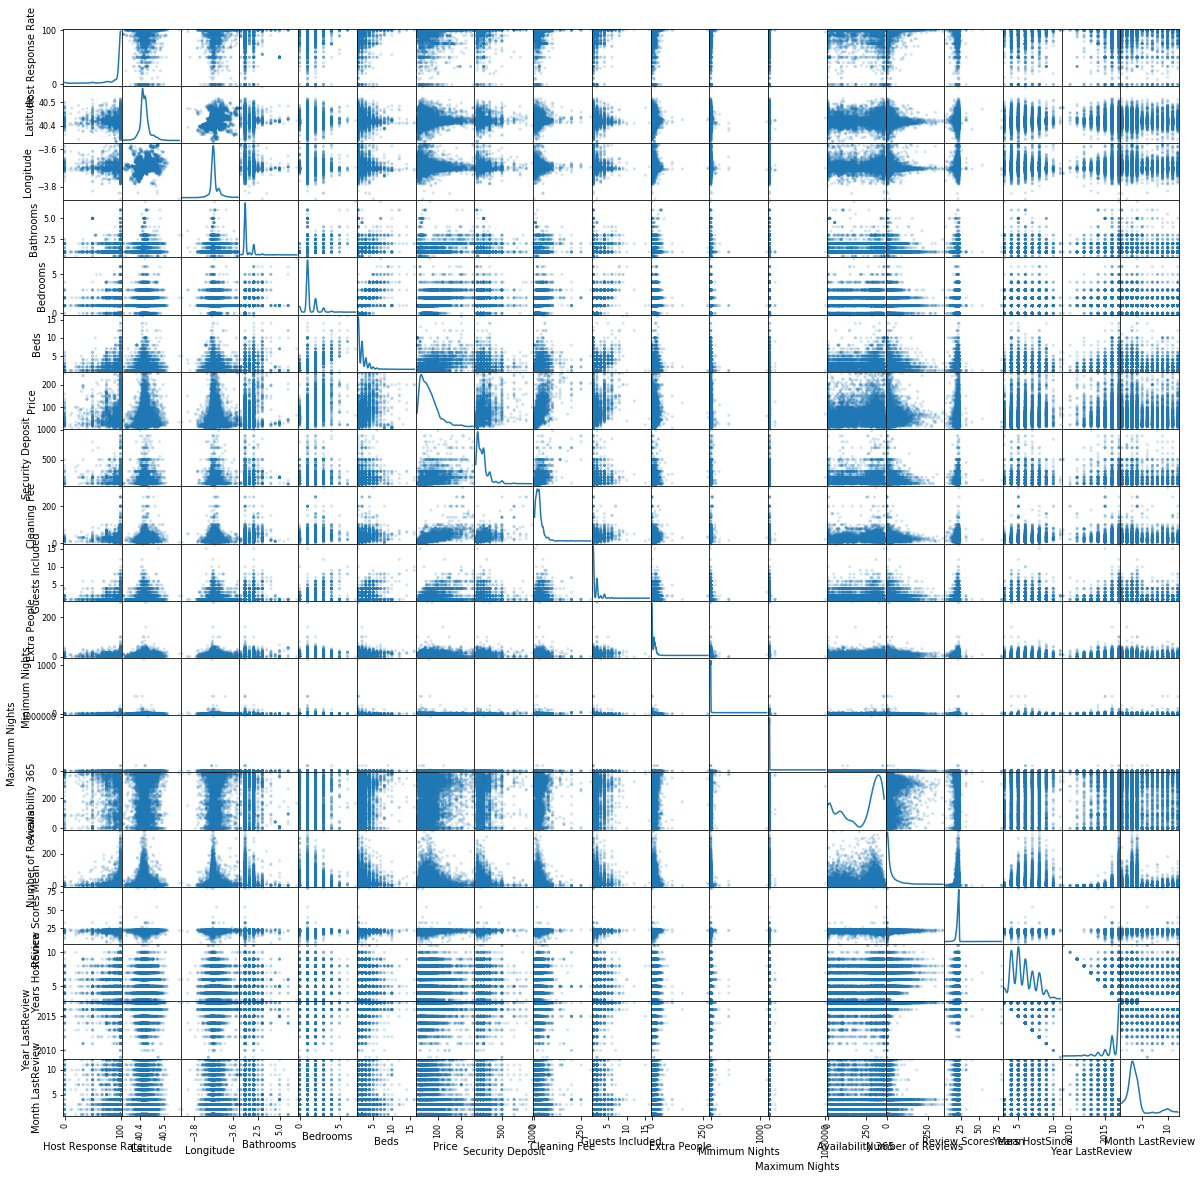

In [71]:
pd.plotting.scatter_matrix(df_train, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

### Selección de características 

Analizamos las variables:
    
    Name
    Summary
    Space
    Description
    Notes
    Transit
    Access
    Interaction
    House Rules
    Features
    
Con algunas de estas variables, tales como Notes o House Rules y Accesss podríamos obtener cierta información para dar más
peso a ciertos alojamientos pero como no sé si me dará tiempo a analizar las herramientas para NLP (Natural Language Processing) procederé a eliminarlas.


In [72]:
# Notes nos podría servir para detectar que los alojamientos disponen de PARKING, Zona gratis para aparcar el coche, así
# como detectar si se permiten mascotas o está permitido Smoking para dar más peso a unos alojamientos que a otros.
df_train['Notes'][0:20]   # Smoking

1                                                   NaN
2                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7                                                   NaN
8                                                   NaN
9                                                   NaN
13                                                  NaN
14                                                  NaN
15                                                  NaN
16                                                  NaN
17                                                  NaN
19    The house is not used to pets. Smoking prefera...
20                                                  NaN
21                                                  NaN
23    Está ubicado en Calle Calatrava, en el centro ...
24    - OPTIONAL  EXTRA FEES (MUST TO BE PAID in

In [73]:
# Con transit 
df_train['Transit'][0:20] 

1                                                   NaN
2     The easy access to our apartments, makes them ...
4                                                   NaN
5     A tan solo 1 minuto andando esta la estación d...
6     Tenemos muy cerca la estacion de metro colonia...
7     To come with a car might be complicated, there...
8     Se encuentra próximo a las estaciones de metro...
9                                                   NaN
13    The metro station Gregorio Marañon and the bus...
14                                                  NaN
15    Lavapiés está ubicado en pleno centro de Madri...
16    The apartment 80 meters away from Lavapiés met...
17    The neighborhood is close enough to all the im...
19    Well connected to airport shuttle, train, metr...
20                                                  NaN
21                                                  NaN
23    The nearest underground stations are La Latina...
24    YOU CAN GET TO THE CENTER WALKING IN 10-15

In [74]:
# Con esta variable podríamos seleccionar una lista de accesorios tales como Wifi, washing machine, microware, fully equipped,
# central heating, oven, por dishwasher, elevator, TV, ... para del mismo modo elevar los pesos de los alojamientos.
df_train['Access'][0:20] 

1                                                   NaN
2     TV, washing machine, Microwave, fully equipped...
4                                                   NaN
5                             Los baños son compartidos
6     Puedes hacer uso del recibo en donde tambien h...
7     You will have the whole studio for yourselves,...
8                                                   NaN
9                                                   NaN
13    The buiding has doorman, central heating and g...
14                                                  NaN
15                                                  NaN
16                                                  NaN
17    The apartment has wi-fi, oven, pot Dishwasher,...
19    We have a fully equipped kitchen with a table ...
20                                        Servicio Wifi
21    Las zonas comunes incluyen cocina moderna y ba...
23                          Free access areas and patio
24    FULLY EQUIPPED APARTMENT WITH ELEVATOR, TV

In [75]:
# Con esta variable podríamos obtener ciertas reglas tales como No Smoking, permitido fumar, No parties inside, No pets,...
# y el horario de entrada check in y salida check out .... 
df_train['House Rules'][0:20] 

1     - Está permitido fumar sólo en la terraza del ...
2     Checkin is done at the apartment. Late checkin...
4                                                   NaN
5                                                   NaN
6     Esperamos un comportamiento normal del huésped...
7     Please no parties inside, there isn't much spa...
8                                                   NaN
9                                                   NaN
13    Hola! Bienvenido a nuestro apartamento, espera...
14    We just ask to be respectful and try to leave ...
15                                                  NaN
16                                                  NaN
17    - Dear guest;  - It is a must to have respect ...
19    Our house is friendly and tolerant. We believe...
20                                                  NaN
21    Deberá enseñarse el carné de identidad o pasap...
23                                                  NaN
24    Read carefully the conditions and standard

In [76]:
df_train['Features'][0:20] 

1                 Host Has Profile Pic,Requires License
2     Host Has Profile Pic,Is Location Exact,Require...
4     Host Has Profile Pic,Host Identity Verified,Is...
5     Host Has Profile Pic,Host Identity Verified,Is...
6     Host Has Profile Pic,Is Location Exact,Require...
7     Host Has Profile Pic,Host Identity Verified,Re...
8     Host Has Profile Pic,Is Location Exact,Require...
9     Host Has Profile Pic,Host Identity Verified,Is...
13    Host Has Profile Pic,Host Identity Verified,Re...
14    Host Has Profile Pic,Host Identity Verified,Re...
15    Host Is Superhost,Host Has Profile Pic,Is Loca...
16    Host Has Profile Pic,Host Identity Verified,Is...
17    Host Has Profile Pic,Host Identity Verified,Re...
19    Host Has Profile Pic,Host Identity Verified,Re...
20    Host Has Profile Pic,Host Identity Verified,Is...
21    Host Has Profile Pic,Host Identity Verified,Is...
23    Host Has Profile Pic,Host Identity Verified,Is...
24    Host Has Profile Pic,Host Identity Verifie

In [77]:
# Columnas a eliminar 
columns_6drop = ['Name', 'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 
                'House Rules', 'Features']

# Drop specified labels from columns
df_train.drop(columns_6drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9678, 34)


Vamos a analizar las variables de tipo objeto      

In [78]:
# Return a subset of the DataFrame's columns based on the column dtypes.

df_train.select_dtypes(include='object').columns

Index(['Experiences Offered', 'Neighborhood Overview', 'Host Response Time',
       'Host Verifications', 'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'Country Code', 'Property Type',
       'Room Type', 'Bed Type', 'Amenities', 'Calendar Updated',
       'Cancellation Policy'],
      dtype='object')

Analizamos el bloque de variables:

    Experiences Offered
    Neighborhood Overview
    Host Response Time
    Host Verifications

In [79]:
# Variable Experiences Offered con valor none en todos los registros --> no aporta información se puede eliminar
check_column(df_train, 'Experiences Offered')
df_train['Experiences Offered'].value_counts().head()

Experiences Offered consta de: 1 valores distintos de un total de 9678
Experiences Offered consta de: 0 valores ausentes, 0.0%


none    9678
Name: Experiences Offered, dtype: int64

In [80]:
# Neighborhood Overview consta de un 36.80% de valores ausentes con lo que descartamos un tratamiento por NLP y
# por tanto descartamos dicha variable
check_column(df_train, 'Neighborhood Overview')
df_train['Neighborhood Overview'].value_counts().head()

Neighborhood Overview consta de: 5412 valores distintos de un total de 9678
Neighborhood Overview consta de: 3562 valores ausentes, 36.8051%


Se trata de una de las zonas más emblemáticas de Madrid, cuenta con todos los servicios y pone a su disposición numerosas tiendas, teatros, cines, bares y restaurantes que harán su estancia más confortable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [81]:
# Host Response Time --> variable a categorizar
check_column(df_train, 'Host Response Time')
df_train['Host Response Time'].value_counts().head()

Host Response Time consta de: 5 valores distintos de un total de 9678
Host Response Time consta de: 1179 valores ausentes, 12.1823%


within an hour        5247
within a few hours    1941
within a day          1128
a few days or more     183
Name: Host Response Time, dtype: int64

In [82]:
# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso within an hour
df_train['Host Response Time'].fillna(df_train['Host Response Time'].mode()[0], inplace=True)

check_column(df_train, 'Host Response Time')

Host Response Time consta de: 4 valores distintos de un total de 9678
Host Response Time consta de: 0 valores ausentes, 0.0%


In [83]:
df_train['Host Response Time'].value_counts()

within an hour        6426
within a few hours    1941
within a day          1128
a few days or more     183
Name: Host Response Time, dtype: int64

In [84]:
# Host Verifications  --> variable a tratar 
check_column(df_train, 'Host Verifications')
df_train['Host Verifications'].value_counts().head()

Host Verifications consta de: 171 valores distintos de un total de 9678
Host Verifications consta de: 1 valores ausentes, 0.0103%


email,phone,reviews                        2440
email,phone,reviews,jumio                  2268
email,phone,reviews,jumio,government_id     623
email,phone,facebook,reviews,jumio          527
email,phone,facebook,reviews                495
Name: Host Verifications, dtype: int64

In [85]:
df_train['Host Verifications'].mode()

0    email,phone,reviews
dtype: object

In [86]:
# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso email,phone,reviews
df_train['Host Verifications'].fillna(df_train['Host Verifications'].mode()[0], inplace=True)

check_column(df_train, 'Host Verifications')

Host Verifications consta de: 170 valores distintos de un total de 9678
Host Verifications consta de: 0 valores ausentes, 0.0%


In [87]:
# Data frame con la mode de las columnas
df_mode = pd.DataFrame({'variables': ['Host Response Time', 'Host Verifications'], 
                        'moda': [df_train['Host Response Time'].mode()[0], df_train['Host Verifications'].mode()[0]]})
df_mode

,variables,moda
0,Host Response Time,within an hour
1,Host Verifications,"email,phone,reviews"


Analizamos el bloque de variables:
    
    Neighbourhood
    Neighbourhood Cleansed
    Neighbourhood Group Cleansed

In [88]:
# Dataframe con dichas columnas o variables
df_neigh = df_train[['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed']]

df_neigh.head(10)

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed
1,NaN,Acacias,Arganzuela
2,La Latina,Embajadores,Centro
4,Sol,Sol,Centro
5,Cortes,Cortes,Centro
6,Aluche,Aguilas,Latina
7,NaN,Embajadores,Centro
8,Guindalera,Guindalera,Salamanca
9,El Viso,El Viso,Chamartín
13,NaN,El Viso,Chamartín
14,NaN,Embajadores,Centro


In [89]:
# Detect missing values en Pandas (isnull or isna )
# Count the Null Columns
null_columns = df_neigh.columns[df_neigh.isnull().any()]
df_neigh[null_columns].isnull().sum()

Neighbourhood    3255
dtype: int64

In [90]:
df_neigh.apply(lambda x: len(x.unique()))

Neighbourhood                    66
Neighbourhood Cleansed          126
Neighbourhood Group Cleansed     21
dtype: int64

In [91]:
# Neighbourhood
check_column(df_train, 'Neighbourhood')

Neighbourhood consta de: 66 valores distintos de un total de 9678
Neighbourhood consta de: 3255 valores ausentes, 33.633%


In [92]:
# Sustituimos los valores ausentes de la variable Neighbourhood por la variable Neighvourhood Cleansed 
# que es más específica que Neighbourhood Group Cleansed
df_train['Neighbourhood'].fillna(df_train['Neighbourhood Cleansed'], inplace=True)

check_column(df_train, 'Neighbourhood')

Neighbourhood consta de: 149 valores distintos de un total de 9678
Neighbourhood consta de: 0 valores ausentes, 0.0%


Analisis de las variables:
    
    City 
    Country Code   
    Property Type
    Room Type
    Bed Type

In [93]:
# Variable City y Country Code validamos que la muestra es en ES Madrid con el filtrado 
# realizado previamente para justificar el drop de dichas columnas o variables
check_column(df_train, 'City')
check_column(df_train, 'Country Code')
df_train['Country Code'].value_counts().head()

City consta de: 11 valores distintos de un total de 9678
City consta de: 0 valores ausentes, 0.0%
Country Code consta de: 1 valores distintos de un total de 9678
Country Code consta de: 0 valores ausentes, 0.0%


ES    9678
Name: Country Code, dtype: int64

In [94]:
# Variables Property Type, Room Type, Bed Type 
check_column(df_train, 'Property Type')
check_column(df_train, 'Room Type')
check_column(df_train, 'Bed Type')

Property Type consta de: 20 valores distintos de un total de 9678
Property Type consta de: 0 valores ausentes, 0.0%
Room Type consta de: 3 valores distintos de un total de 9678
Room Type consta de: 0 valores ausentes, 0.0%
Bed Type consta de: 5 valores distintos de un total de 9678
Bed Type consta de: 0 valores ausentes, 0.0%


Analisis de las variables:

    Amenities
    Calendar Updated                      
    Cancellation Policy 

In [95]:
# Amenities  --> variable a tratar 
check_column(df_train, 'Amenities')
df_train['Amenities'].value_counts().head()

Amenities consta de: 8347 valores distintos de un total de 9678
Amenities consta de: 60 valores ausentes, 0.62%


TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers,Hair dryer,Iron,Laptop friendly workspace                             35
TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron                                                                           25
TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace    22
Wireless Internet,Heating,Fire extinguisher,Lock on bedroom door,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50                                                                           19
translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50   

In [96]:
# En este caso decido sustituir los valores ausentes por "" para que en caso de tratar dicha variable la interpretación
# sea más objetiva que con respecto al resto de alojamientos

df_train['Amenities'].fillna("", inplace=True)
check_column(df_train, 'Amenities')

Amenities consta de: 8347 valores distintos de un total de 9678
Amenities consta de: 0 valores ausentes, 0.0%


In [97]:
# Calendar Updated
check_column(df_train, 'Calendar Updated')
df_train['Calendar Updated'].value_counts().head()

Calendar Updated consta de: 51 valores distintos de un total de 9678
Calendar Updated consta de: 0 valores ausentes, 0.0%


today          2478
yesterday       824
2 weeks ago     795
a week ago      744
3 days ago      553
Name: Calendar Updated, dtype: int64

In [98]:
# Cancellation Policy 
check_column(df_train, 'Cancellation Policy')
df_train['Cancellation Policy'].value_counts().head()

Cancellation Policy consta de: 5 valores distintos de un total de 9678
Cancellation Policy consta de: 0 valores ausentes, 0.0%


strict             3650
flexible           3108
moderate           2914
super_strict_60       5
super_strict_30       1
Name: Cancellation Policy, dtype: int64

In [99]:
# Columnas a eliminar según el análisis realizado
columns_7drop = ['Experiences Offered', 'Neighborhood Overview', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',
                 'City', 'Country Code']

# Drop specified labels from columns
df_train.drop(columns_7drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9678, 28)


In [100]:
# Creación de nuevas características a partir de las variables Host Verifications y Amenities
# Ambas variables contienen información separada por coma, de manera que podemos contabilizar el nº de elementos
# para así tenerlo en cuenta como una nueva característica para estas variables
df_train['Host Verifications'] = df_train['Host Verifications'].apply(lambda x: len(str(x).split(',')))
df_train['Amenities'] = df_train['Amenities'].apply(lambda x: len(str(x).split(',')))

In [101]:
df_train.head().T

,1,2,4,5,6
Host Response Time,within a day,within a few hours,within an hour,a few days or more,within an hour
Host Response Rate,90,75,100,0,100
Host Verifications,3,3,6,5,3
Neighbourhood,Acacias,La Latina,Sol,Cortes,Aluche
Latitude,40.4021,40.4089,40.4198,40.4183,40.3935
Longitude,-3.70301,-3.70832,-3.70069,-3.69889,-3.77118
Property Type,Apartment,Apartment,Apartment,Guesthouse,Apartment
Room Type,Private room,Entire home/apt,Entire home/apt,Private room,Private room
Bathrooms,2,2,1,2,1
Bedrooms,1,3,0,1,1


### Categorización de variables categóricas

Realizamos la categorización de estas variables a través de mean encoding 

    Host Response Time
    Neighbourhood
    Property Type
    Room Type
    Bed Type
    Calendar Updated
    Cancellation Policy
    
Mean encoding is similar to label encoding, except here labels are correlated directly with the target

In [102]:
df_train.select_dtypes(include='object').columns

Index(['Host Response Time', 'Neighbourhood', 'Property Type', 'Room Type',
       'Bed Type', 'Calendar Updated', 'Cancellation Policy'],
      dtype='object')

In [103]:
# categ_variables: list of variables to encode
categ_variables = ['Host Response Time', 'Neighbourhood', 'Property Type', 'Room Type', 'Bed Type',
                   'Calendar Updated', 'Cancellation Policy']

# mean_map: dict, mapping to be used on validation/test datasets 
mean_map = dict()    
for v in categ_variables:
    mean_encode = df_train.groupby(v)['Price'].mean()
    df_train[v]=df_train[v].map(mean_encode)
    mean_map[v] = mean_encode

In [104]:
mean_map

{'Host Response Time': Host Response Time
 a few days or more    60.650273
 within a day          57.970745
 within a few hours    62.905719
 within an hour        62.956116
 Name: Price, dtype: float64, 'Neighbourhood': Neighbourhood
 Abrantes                         38.333333
 Acacias                          45.938776
 Adelfas                          54.270270
 Aeropuerto                       37.000000
 Aguilas                          20.375000
 Alameda de Osuna                 29.000000
 Almagro                          76.818182
 Almenara                         50.578947
 Almendrales                      40.166667
 Aluche                           34.380952
 Ambroz                           23.250000
 Amposta                          21.750000
 Apostol Santiago                 48.666667
 Arapiles                         56.114754
 Aravaca                          45.500000
 Arcos                            41.000000
 Arganzuela                       38.333333
 Argüelles       

In [105]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,9678.0,62.321347,1.610957,57.970745,62.905719,62.956116,62.956116,62.956116
Host Response Rate,8499.0,94.906460,14.941262,0.000000,100.000000,100.000000,100.000000,100.000000
Host Verifications,9678.0,4.122443,1.289375,1.000000,3.000000,4.000000,5.000000,10.000000
Neighbourhood,9678.0,62.321347,15.362339,18.500000,52.923664,63.337662,73.696296,105.883929
Latitude,9678.0,40.420306,0.019921,40.332908,40.410000,40.418249,40.427577,40.562736
Longitude,9678.0,-3.697214,0.023308,-3.863907,-3.707760,-3.701612,-3.693966,-3.575142
Property Type,9678.0,62.321347,5.961974,17.000000,63.987803,63.987803,63.987803,145.000000
Room Type,9678.0,62.321347,24.309501,26.746269,32.576861,82.036840,82.036840,82.036840
Bathrooms,9678.0,1.242612,0.550850,0.500000,1.000000,1.000000,1.000000,7.000000
Bedrooms,9678.0,1.269580,0.765840,0.000000,1.000000,1.000000,1.000000,7.000000


Aún quedan variables numéricas con valores ausentes como:
    
    Host Response Rate
    Beds
    Security Deposit
    Cleaning Fee
    Review Scores Mean   

In [106]:
# Columnas o variables aún con valores ausentes
null_columns = df_train.columns[df_train.isnull().any()]

# Data frame con la media para las columnas o variables con valores ausentes
df_mean = dict()
for v in null_columns:
    df_mean[v] = df_train[v].mean()


In [107]:
df_mean
# null_columns = ['Host Response Rate', 'Beds', 'Security Deposit', 'Cleaning Fee', 'Review Scores Mean']
# df_train[null_columns].mean()

{'Host Response Rate': 94.90645958348041,
 'Beds': 1.9466446075897013,
 'Security Deposit': 180.82520808561236,
 'Cleaning Fee': 28.67012268878521,
 'Review Scores Mean': 21.25335366043754}

In [108]:
# Sustituimos los valores ausentes por la media
df_train.fillna(df_train.mean(), inplace = True)

In [109]:
# Comprobamos que el count en todas las variables coincide con len del data frame
df_train.describe()

,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Availability 365,Number of Reviews,Cancellation Policy,Review Scores Mean,Years HostSince,Year LastReview,Month LastReview
count,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.00000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.00000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000,9678.000000
mean,62.321347,94.906460,4.122443,62.321347,40.420306,-3.697214,62.321347,62.321347,1.242612,1.26958,1.946645,62.321347,14.322794,62.321347,180.825208,28.670123,1.561273,7.413825,3.043294,988.399256,62.321347,204.55280,23.270614,62.321347,21.253354,5.690329,2016.313185,4.739202
std,1.610957,14.001523,1.289375,15.362339,0.019921,0.023308,5.961974,24.309501,0.550850,0.76584,1.409473,1.543358,4.654405,40.826435,70.022910,16.829514,1.028335,10.056324,14.200526,10373.293204,10.926826,127.27608,38.292334,6.784080,2.043897,1.616123,1.131881,3.096794
min,57.970745,0.000000,1.000000,18.500000,40.332908,-3.863907,17.000000,26.746269,0.500000,0.00000,1.000000,44.107143,1.000000,10.000000,70.000000,5.000000,1.000000,0.000000,1.000000,1.000000,25.000000,0.00000,0.000000,54.008687,4.857143,3.000000,2009.000000,1.000000
25%,62.905719,94.906460,3.000000,52.923664,40.410000,-3.707760,63.987803,32.576861,1.000000,1.00000,1.000000,62.539055,11.000000,31.000000,175.000000,20.000000,1.000000,0.000000,1.000000,365.000000,55.179487,82.00000,1.000000,54.008687,21.000000,4.000000,2016.000000,3.000000
50%,62.956116,100.000000,4.000000,63.337662,40.418249,-3.701612,63.987803,82.036840,1.000000,1.00000,1.000000,62.539055,14.000000,52.000000,180.825208,28.670123,1.000000,5.000000,2.000000,1125.000000,59.202516,246.00000,8.000000,61.518531,21.253354,5.000000,2017.000000,4.000000
75%,62.956116,100.000000,5.000000,73.696296,40.427577,-3.693966,63.987803,82.036840,1.000000,1.00000,2.000000,62.539055,17.000000,80.000000,180.825208,30.000000,2.000000,15.000000,3.000000,1125.000000,78.907587,320.00000,28.000000,69.958904,22.285714,7.000000,2017.000000,6.000000
max,62.956116,100.000000,10.000000,105.883929,40.562736,-3.575142,145.000000,82.036840,7.000000,7.00000,16.000000,62.539055,34.000000,250.000000,990.000000,300.000000,16.000000,276.000000,1125.000000,1000000.000000,217.500000,365.00000,344.000000,117.800000,80.000000,11.000000,2017.000000,12.000000


In [110]:
df_train.dtypes

Host Response Time     float64
Host Response Rate     float64
Host Verifications       int64
Neighbourhood          float64
Latitude               float64
Longitude              float64
Property Type          float64
Room Type              float64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type               float64
Amenities                int64
Price                  float64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Extra People             int64
Minimum Nights           int64
Maximum Nights           int64
Calendar Updated       float64
Availability 365         int64
Number of Reviews        int64
Cancellation Policy    float64
Review Scores Mean     float64
Years HostSince          int64
Year LastReview          int64
Month LastReview         int64
dtype: object

#### Desactivación de las siguientes variables (Lasso)

        Host Verifications
        Property Type
        Maximum Nights

In [137]:
# Columnas a eliminar según Lasso
columns_8drop = ['Host Verifications', 'Property Type', 'Maximum Nights']

# Drop specified labels from columns
df_train.drop(columns_8drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9678, 25)


In [159]:
# Optamos por eliminar las siguientes variables teniendo en cuenta las características menos relevantes en Random Forest 

columns_9drop = ['Bed Type', 'Host Response Time', 'Cancellation Policy', 'Host Response Rate', 'Year LastReview']
df_train.drop(columns_9drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9678, 20)


## 3. Algoritmos Machine Learning (Optimización)

In [111]:
# Return a list of the values
df_train.columns.tolist()

['Host Response Time',
 'Host Response Rate',
 'Host Verifications',
 'Neighbourhood',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Availability 365',
 'Number of Reviews',
 'Cancellation Policy',
 'Review Scores Mean',
 'Years HostSince',
 'Year LastReview',
 'Month LastReview']

In [138]:
print(f'Dimensiones datos entrenamiento son: {df_train.shape}')

Dimensiones datos entrenamiento son: (9678, 25)


In [113]:
# Cambiamos la posición de la columna Price en la posición primera
df_train = change_column_order(df_train, 'Price', 0)

In [139]:
df_train.columns.tolist()

['Price',
 'Host Response Time',
 'Host Response Rate',
 'Neighbourhood',
 'Latitude',
 'Longitude',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Calendar Updated',
 'Availability 365',
 'Number of Reviews',
 'Cancellation Policy',
 'Review Scores Mean',
 'Years HostSince',
 'Year LastReview',
 'Month LastReview']

In [160]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_train.values

y_train = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_train = data[:,1:]      # nos quedamos con el resto

feature_names = df_train.columns[1:]

# Escalamos (con los datos de train)  - StandardScaler (x- media/desviación)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

#### Muestra de test 

Todas las transformaciones realizadas en train las aplicamos ahora en test

In [116]:
# Cargar el df test y aplicamos todas las transformaciones

df_test = pd.read_csv('../project/airbnb_test.csv', sep=';', decimal='.')    

print(f'Dimensiones datos test son: {df_test.shape}')

# Columnas a eliminar porque no aportan información 
columns_1drop = ['Listing Url', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 
                'Host URL', 'Host Thumbnail Url', 'Host Picture Url', 
                'ID', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped', 'Weekly Price', 'Monthly Price',
                'Reviews per Month', 'Geolocation', 
                'Host ID', 'Host Name', 'Host Location', 'Host About', 'Host Neighbourhood',
                'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']

df_test.drop(columns_1drop, axis=1, inplace=True) 

# Columnas a eliminar porque tiene un porcentaje superior al 90% de valores perdidos
columns_2drop = ['Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names']
df_test.drop(columns_2drop, axis=1, inplace=True) 

# Columnas a eliminar porque la información la podemos obtener de las variables Neighbourdhood, City y County Code
columns_3drop = ['Street', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country']
df_test.drop(columns_3drop, axis=1, inplace=True)  

# Filtro City  
list_of_madrid = ['Madrid', 'Madrid, Comunidad de Madrid, ES', 'madrid', 'MADRID', 'las matas  madrid', 
                  'Boadilla del Monte', 'Delicias-Madrid', 'Delicias', 'Aravaca (Madrid)', 
                  'Chueca, Madrid', 'Madrid, Comunidad de Madrid, ESPANA']

df_test_filtered = df_test[df_test['City'].isin(list_of_madrid)]

# Chequeo del filtro
check_filter(df_test, df_test_filtered)
# Aplicamos el filtro City
df_test = df_test[df_test['City'].isin(list_of_madrid)]

# Filtro de Bedrooms y Bathrooms
df_test_filtered = df_test[(df_test['Bedrooms']<=7)&(df_test['Bathrooms']<=7)&(df_test['Bathrooms']!=0)]
df_test = df_test_filtered

# Filter Price 
filter_price = df_test['Price'] <= 250
df_test_filtered = df_test[filter_price]

# Chequeo del filtro
check_filter(df_test, df_test_filtered)

# Aplicamos el filtro para Price
df_test = df_test[filter_price]

df_review = df_test.loc[:,'Review Scores Rating':'Review Scores Value']
df_test['Review Scores Mean'] = df_review.mean(axis=1)

# Columnas a eliminar porque una alta correlación y esto origina valores redundantes
columns_4drop = ['Accommodates', 'Availability 30', 'Availability 60', 'Availability 90',
                'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
                'Review Scores Communication', 'Review Scores Location', 
                'Review Scores Rating', 'Review Scores Value']
df_test.drop(columns_4drop, axis=1, inplace=True) 

# Eliminamos 1 registro ausente de la variable Host Since 
df_test.dropna(subset=['Host Since'], inplace=True)

# Sustituimos los valores ausentes por 'Host Since'
df_test['Last Review'].fillna(df_test['Host Since'], inplace=True)

# Generación de nuevas características
df_test['Host Since']      = df_test['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['Years HostSince'] = df_test['Host Since'].apply(lambda x: 2020 - x.year)
df_test['Last Review']      = df_test['Last Review'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))
df_test['Year LastReview']  = df_test['Last Review'].apply(lambda x: x.year)
df_test['Month LastReview'] = df_test['Last Review'].apply(lambda x: x.month)

columns_5drop = ['Host Since', 'Last Review', 'First Review']
df_test.drop(columns_5drop, axis=1, inplace=True)  

columns_6drop = ['Name', 'Summary', 'Space', 'Description', 'Notes', 'Transit', 'Access', 'Interaction', 
                'House Rules', 'Features']
df_test.drop(columns_6drop, axis=1, inplace=True) 

# Sustituimos los valores ausentes por la moda, es decir el valor que más se repite, en este caso within an hour
df_test['Host Response Time'].fillna(df_mode['moda'][0], inplace=True)
df_test['Host Verifications'].fillna(df_mode['moda'][1], inplace=True)

# Sustituimos los valores ausentes por Neighbourhood Cleansed
df_test['Neighbourhood'].fillna(df_test['Neighbourhood Cleansed'], inplace=True)
df_test['Amenities'].fillna("", inplace=True)

df_test['Host Verifications'] = df_test['Host Verifications'].apply(lambda x: len(str(x).split(',')))
df_test['Amenities'] = df_test['Amenities'].apply(lambda x: len(str(x).split(',')))


# Filtramos los registros de test no categorizados en train 
df_test_filtered = df_test[(df_test['Neighbourhood Cleansed']!= 'Cuatro Vientos') & 
        (df_test['Calendar Updated']!= '28 months ago') &
        (df_test['Property Type']!= 'Timeshare')
       ]   
check_filter(df_test, df_test_filtered)
df_test = df_test_filtered

# Categorización de variables a través de mean encode obtenido en train
categ_variables = ['Host Response Time', 'Neighbourhood', 'Property Type', 'Room Type', 'Bed Type',
                    'Calendar Updated', 'Cancellation Policy']
for v in categ_variables:
    df_test[v]=df_test[v].map(mean_map[v])

columns_7drop = ['Experiences Offered', 'Neighborhood Overview', 'Neighbourhood Cleansed',  
                 'Neighbourhood Group Cleansed', 'City', 'Country Code']
df_test.drop(columns_7drop, axis=1, inplace=True) 

# Sustituimos los valores ausentes por la media obtenida en train
null_columns = df_test.columns[df_test.isnull().any()]
for v in null_columns:
    df_test[v] = df_mean[v]
    
print(f'Dimensiones datos test son: {df_test.shape}')

Dimensiones datos test son: (3695, 89)
Original: (3695, 54)
Modificado: (3317, 54)
10.23% alojamientos filtrados
Original: (3282, 54)
Modificado: (3248, 54)
1.036% alojamientos filtrados
Original: (3247, 34)
Modificado: (3244, 34)
0.0924% alojamientos filtrados
Dimensiones datos test son: (3244, 28)


In [141]:
# Columnas a eliminar según Lasso
columns_8drop = ['Host Verifications', 'Property Type', 'Maximum Nights']
df_test.drop(columns_8drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_test.shape}')

Dimensiones datos entrenamiento son: (3244, 25)


In [161]:
# Optamos por eliminar las siguientes variables teniendo en cuenta las características menos relevantes en Random Forest 

columns_9drop = ['Bed Type', 'Host Response Time', 'Cancellation Policy', 'Host Response Rate', 'Year LastReview']
df_test.drop(columns_9drop, axis=1, inplace=True)  

print(f'Dimensiones datos entrenamiento son: {df_test.shape}')

Dimensiones datos entrenamiento son: (3244, 20)


In [117]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Time,3244.0,62.335585,1.588401e+00,57.970745,62.905719,62.956116,62.956116,62.956116
Host Response Rate,3244.0,94.906460,6.907540e-12,94.906460,94.906460,94.906460,94.906460,94.906460
Host Verifications,3244.0,4.119914,1.299962e+00,1.000000,3.000000,4.000000,5.000000,9.000000
Neighbourhood,3244.0,61.597467,1.526625e+01,20.375000,51.276316,63.273148,73.696296,105.883929
Latitude,3244.0,40.420955,2.075951e-02,40.331888,40.409930,40.419005,40.428169,40.513673
Longitude,3244.0,-3.696847,2.371132e-02,-3.785982,-3.707709,-3.701571,-3.693282,-3.573613
Property Type,3244.0,62.134490,5.818205e+00,20.500000,63.987803,63.987803,63.987803,82.050000
Room Type,3244.0,61.564062,2.446431e+01,26.746269,32.576861,82.036840,82.036840,82.036840
Bathrooms,3244.0,1.222719,5.153624e-01,0.500000,1.000000,1.000000,1.000000,6.000000
Bedrooms,3244.0,1.263255,7.369337e-01,0.000000,1.000000,1.000000,1.000000,6.000000


In [118]:
# Cambiamos la posición de la columna Price en la posición primera
df_test = change_column_order(df_test, 'Price', 0)
df_test.columns.tolist()

['Price',
 'Host Response Time',
 'Host Response Rate',
 'Host Verifications',
 'Neighbourhood',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Calendar Updated',
 'Availability 365',
 'Number of Reviews',
 'Cancellation Policy',
 'Review Scores Mean',
 'Years HostSince',
 'Year LastReview',
 'Month LastReview']

In [162]:
from sklearn import preprocessing

# convertimos el DataFrame al formato necesario para scikit-learn
data = df_test.values

y_test = data[:,0:1]     # nos quedamos con la 1ª columna, Price
X_test = data[:,1:]      # nos quedamos con el resto

feature_names = df_test.columns[1:]

# Escalamos (con los datos de test con el escaler empleado en train
# scaler = preprocessing.StandardScaler().fit(X_train)
XtestScaled = scaler.transform(X_test)

### Regularización

Como medida contra el overfitting aplicamos regularización, con Lasso, para penalizar coeficientes grandes y redudir la complejidad del modelo.

#### Lasso

El algoritmo Lasso permite activar/desactivar coeficientes, de tal forma que se desactivan primero los coeficienes asociados a los atributos que menos influyen en la función de coste (función a minimizar anterior). Con ello:

1. Se previene el overfitting, al poder utilizar modelos con menos variables (las desactivamos)
2. Se gana interpretabilidad, al poder ver cómo evolucionan las variables supervivientes.

Utilizaremos la capacidad de Lasso para la selección de variables  

best mean cross-validation score: -593.349
best parameters: {'alpha': 0.12115276586285902}


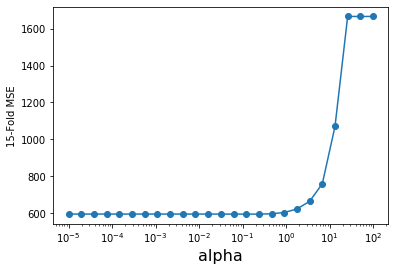

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-5, 2, 25)  # vector de alphas
param_grid = {'alpha': alpha_vector }
# scoring = métrica
# nfolds = 15
# cv CROSS VALIDATION
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 15)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])  # GridSearchCV tiene a maximizar los resultados por eso es -1*
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('15-Fold MSE')
#plt.ylim((0, 1))  # limitar el gráfico
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

print('R2 Modelo Lasso (train): %0.3g' % lasso.score(XtrainScaled, y_train))
print('R2 Modelo Lasso (test) : %0.3g' % lasso.score(XtestScaled, y_test))

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 589
MSE Modelo Lasso (test) : 717
RMSE Modelo Lasso (train): 24.3
RMSE Modelo Lasso (test) : 26.8
R2 Modelo Lasso (train): 0.647
R2 Modelo Lasso (test) : 0.569
Neighbourhood 8.304007291669704
Latitude -0.12557918728812711
Longitude 0.2566902630680469
Room Type 15.240889952180462
Bathrooms 3.055180337402602
Bedrooms 9.739646676897841
Beds 2.595349547600391
Amenities 1.8033851976689943
Security Deposit 2.5401988705817846
Cleaning Fee 8.311748275152521
Guests Included 3.159775083040148
Extra People -1.3451924125864627
Minimum Nights -0.6791365317325535
Calendar Updated 2.104933057009315
Availability 365 2.1421271126946437
Number of Reviews -3.026690344601838
Review Scores Mean 1.4374718183234168
Years HostSince 0.1902421108854112
Month LastReview 1.8083797972951896


Resultado tras desactivar las variables Host Verifications-Property Type-Maximum Nights  (coeficientes a 0 Lasso)

    MSE Modelo Lasso (train): 582
    MSE Modelo Lasso (test) : 708
    RMSE Modelo Lasso (train): 24.1
    RMSE Modelo Lasso (test) : 26.6
    R2 Modelo Lasso (train): 0.651
    R2 Modelo Lasso (test) : 0.574
    Host Response Time 0.010389559659051828
    Host Response Rate -0.7856823215435796
    Neighbourhood 8.367650470697034
    Latitude -0.2934145043136849
    Longitude 0.2857864777858166
    Room Type 15.418184919295587
    Bathrooms 2.920754234662666
    Bedrooms 9.65498347458292
    Beds 2.683958796059659
    Bed Type 0.3828019175721979
    Amenities 2.1486161585997103
    Security Deposit 2.515960589305953
    Cleaning Fee 8.160464084922742
    Guests Included 3.347256100280358
    Extra People -1.239549488827005
    Minimum Nights -0.6801365392747406
    Calendar Updated 2.3665522956103953
    Availability 365 2.3615459440260516
    Number of Reviews -2.308963007037129
    Cancellation Policy -0.9020649644932317
    Review Scores Mean 1.4100938127669997
    Years HostSince -0.14592542520041313
    Year LastReview -2.557035114194184
    Month LastReview 0.6653838924724879

Resultado inicial  (antes de desactivar las variables Host Verifications-Property Type-Maximum Nights)

    MSE Modelo Lasso (train): 582
    MSE Modelo Lasso (test) : 708
    RMSE Modelo Lasso (train): 24.1
    RMSE Modelo Lasso (test) : 26.6
    R2 Modelo Lasso (train): 0.651
    R2 Modelo Lasso (test) : 0.574
    Host Response Time 0.010389809686369758
    Host Response Rate -0.7856822532450406
    Host Verifications 0.0
    Neighbourhood 8.367647804919423
    Latitude -0.29341464414867385
    Longitude 0.2857868894587748
    Property Type -0.0
    Room Type 15.418189562274671
    Bathrooms 2.9207527365352157
    Bedrooms 9.654999151046368
    Beds 2.683953894865046
    Bed Type 0.3828016167566225
    Amenities 2.1486154082247215
    Security Deposit 2.515960978532382
    Cleaning Fee 8.160463228353564
    Guests Included 3.347249137530995
    Extra People -1.239548761503011
    Minimum Nights -0.6801364829718612
    Maximum Nights -0.0
    Calendar Updated 2.3665515533884953
    Availability 365 2.361546031810581
    Number of Reviews -2.3089620021537915
    Cancellation Policy -0.9020641256339973
    Review Scores Mean 1.410093628643743
    Years HostSince -0.14592558479989998
    Year LastReview -2.557034101959042
    Month LastReview 0.6653846428909191
    
Con este algoritmo se obtienen las variables con coeficientes a 0 para su desactivación del modelo:

    Host Verifications
    Property Type
    Maximum Nights

#### Árbol de decisión

best mean cross-validation score: 0.630
best parameters: {'max_depth': 6}


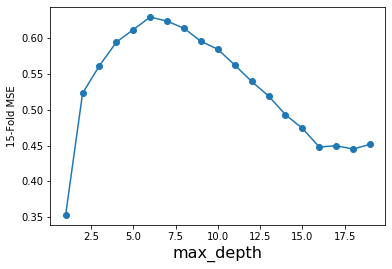

In [166]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

maxDepth = range(1,20)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0),  param_grid=param_grid, cv = 15)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('15-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [167]:
from sklearn.metrics import mean_squared_error

maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

ytrainTree = treeModel.predict(XtrainScaled)
ytestTree  = treeModel.predict(XtestScaled)
mseTrainModelTree = mean_squared_error(y_train,ytrainTree)
mseTestModelTree = mean_squared_error(y_test,ytestTree)

print('MSE Modelo Tree (train): %0.3g' % mseTrainModelTree)
print('MSE Modelo Tree (test) : %0.3g' % mseTestModelTree)

print('RMSE Modelo Tree (train): %0.3g' % np.sqrt(mseTrainModelTree))
print('RMSE Modelo Tree (test) : %0.3g' % np.sqrt(mseTestModelTree))

print('R2 Modelo Tree (train): %0.3g' % treeModel.score(XtrainScaled, y_train))
print('R2 Modelo Tree (test) : %0.3g' % treeModel.score(XtestScaled, y_test))

MSE Modelo Tree (train): 3.27e+03
MSE Modelo Tree (test) : 3.16e+03
RMSE Modelo Tree (train): 57.2
RMSE Modelo Tree (test) : 56.2
R2 Modelo Tree (train): -0.963
R2 Modelo Tree (test) : -0.902


[Text(141.06741573033707, 201.90857142857143, 'X[3] <= 57.307\nmse = 1666.626\nsamples = 9678\nvalue = 62.321'),
 Text(61.59943820224719, 170.84571428571428, 'X[0] <= 52.931\nmse = 339.748\nsamples = 3842\nvalue = 32.374'),
 Text(40.43932584269663, 139.78285714285715, 'X[13] <= 79.454\nmse = 168.018\nsamples = 1551\nvalue = 26.391'),
 Text(28.213483146067418, 108.72, 'X[14] <= 361.5\nmse = 159.439\nsamples = 1549\nvalue = 26.29'),
 Text(15.047191011235956, 77.65714285714284, 'X[0] <= 45.222\nmse = 130.181\nsamples = 1291\nvalue = 25.139'),
 Text(7.523595505617978, 46.59428571428572, 'X[1] <= 40.439\nmse = 87.966\nsamples = 837\nvalue = 23.097'),
 Text(3.761797752808989, 15.531428571428563, 'mse = 78.168\nsamples = 727\nvalue = 22.25'),
 Text(11.285393258426968, 15.531428571428563, 'mse = 116.686\nsamples = 110\nvalue = 28.691'),
 Text(22.570786516853936, 46.59428571428572, 'X[2] <= -3.586\nmse = 186.154\nsamples = 454\nvalue = 28.903'),
 Text(18.808988764044944, 15.531428571428563, 'ms

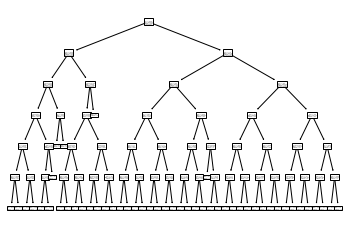

In [168]:
from sklearn import tree

tree.plot_tree(treeModel) 

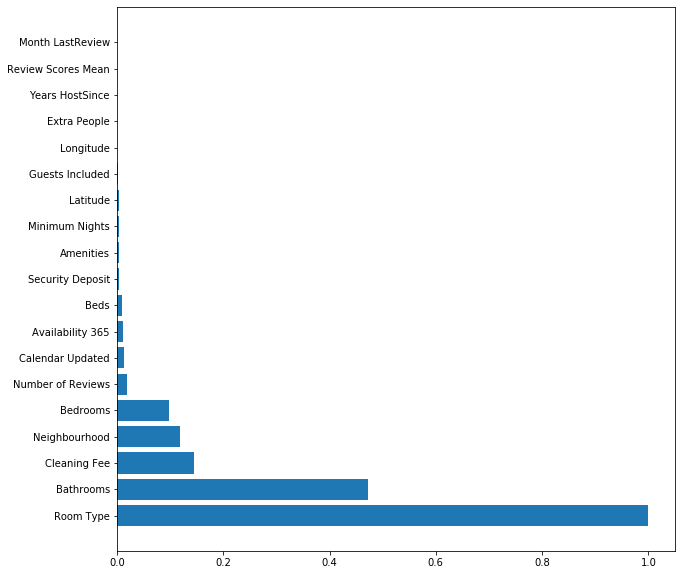

In [169]:
importances = treeModel.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),feature_names[indices])
plt.show()

In [170]:
# Probamos variando el parámetro max_depth 
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo+2).fit(X_train,y_train)

ytrainTree = treeModel.predict(XtrainScaled)
ytestTree  = treeModel.predict(XtestScaled)
mseTrainModelTree = mean_squared_error(y_train,ytrainTree)
mseTestModelTree = mean_squared_error(y_test,ytestTree)

print('MSE Modelo Tree (train): %0.3g' % mseTrainModelTree)
print('MSE Modelo Tree (test) : %0.3g' % mseTestModelTree)

print('RMSE Modelo Tree (train): %0.3g' % np.sqrt(mseTrainModelTree))
print('RMSE Modelo Tree (test) : %0.3g' % np.sqrt(mseTestModelTree))

print('R2 Modelo Tree (train): %0.3g' % treeModel.score(XtrainScaled, y_train))
print('R2 Modelo Tree (test) : %0.3g' % treeModel.score(XtestScaled, y_test))

MSE Modelo Tree (train): 3.82e+03
MSE Modelo Tree (test) : 3.72e+03
RMSE Modelo Tree (train): 61.8
RMSE Modelo Tree (test) : 61
R2 Modelo Tree (train): -1.29
R2 Modelo Tree (test) : -1.24


#### Boosted Trees

In [171]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,2000, 4000, 6000]
learningRate = [0.1, 0.05, 0.01]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 10)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.743
best parameters: {'learning_rate': 0.01, 'n_estimators': 6000}


MSE Modelo BT (train): 280
MSE Modelo BT (test) : 593
RMSE Modelo BT (train): 16.7
RMSE Modelo BT (test) : 24.3
R2 Modelo BT (train): 0.832
R2 Modelo BT (test) : 0.643


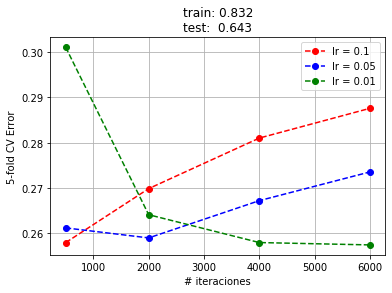

In [172]:
from sklearn.metrics import mean_squared_error

lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(XtrainScaled,y_train)

ytrainBT = bt.predict(XtrainScaled)
ytestBT  = bt.predict(XtestScaled)
mseTrainModelBT = mean_squared_error(y_train,ytrainBT)
mseTestModelBT = mean_squared_error(y_test,ytestBT)

print('MSE Modelo BT (train): %0.3g' % mseTrainModelBT)
print('MSE Modelo BT (test) : %0.3g' % mseTestModelBT)

print('RMSE Modelo BT (train): %0.3g' % np.sqrt(mseTrainModelBT))
print('RMSE Modelo BT (test) : %0.3g' % np.sqrt(mseTestModelBT))

print('R2 Modelo BT (train): %0.3g' % bt.score(XtrainScaled, y_train))
print('R2 Modelo BT (test) : %0.3g' % bt.score(XtestScaled, y_test))


error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(XtrainScaled,y_train),bt.score(XtestScaled,y_test)))
plt.grid()
plt.show()

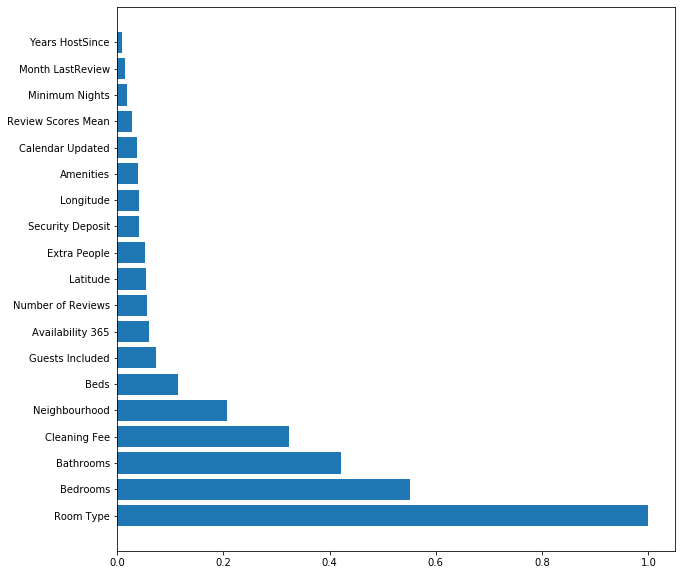

In [173]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),feature_names[indices])
plt.show()

Las variables con menor peso según importancia y dependencia son:

    Bed Types 
    Host Response Time
    Cancellation Policy
    Maximum Nights (eliminar según Lasso)
    Property Type  (eliminar según Lasso)
    Month LastReview
    Years Host Since
    Host Verifications (eliminar según Lasso)
    Host Response Rate
    Minimum Nights
    Review Scores Mean
    Year LastReview
    Calendar Updated

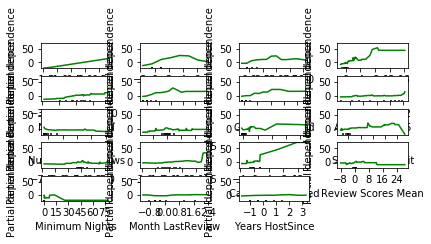

In [174]:
from sklearn.inspection import plot_partial_dependence

fig = plot_partial_dependence(bt, XtrainScaled, indices, feature_names=feature_names,
                                 percentiles=(0.0, 1.0), n_cols = 4)

plt.show()

#### Random Forest

best mean cross-validation score: 0.738
best parameters: {'max_depth': 19}


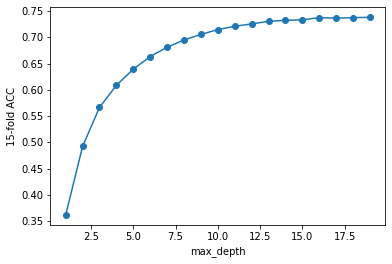

In [175]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

# Nº de arboles construidos = n_estimators
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=15) 
grid.fit(XtrainScaled, y_train)

y_pred = grid.predict(XtestScaled)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('15-fold ACC')

plt.show()

In [176]:
from sklearn import metrics

maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train)

ytrainRF = bagModel.predict(XtrainScaled)
ytestRF  = bagModel.predict(XtestScaled)
mseTrainbagModel = mean_squared_error(y_train,ytrainRF)
mseTestbagModel = mean_squared_error(y_test,ytestRF)

print('MSE Modelo RF (train): %0.3g' % mseTrainbagModel)
print('MSE Modelo RF (test) : %0.3g' % mseTestbagModel)

print('RMSE Modelo RF (train): %0.3g' % np.sqrt(mseTrainbagModel))
print('RMSE Modelo RF (test) : %0.3g' % np.sqrt(mseTestbagModel))

print('R2 Modelo RF (train): %0.3g' % bagModel.score(XtrainScaled, y_train))
print('R2 Modelo RF (test) : %0.3g' % bagModel.score(XtestScaled, y_test))

MSE Modelo RF (train): 73.9
MSE Modelo RF (test) : 580
RMSE Modelo RF (train): 8.6
RMSE Modelo RF (test) : 24.1
R2 Modelo RF (train): 0.956
R2 Modelo RF (test) : 0.651


In [180]:
# Si variamos the maximum depth of the tree el valor de train y test mejora pero el modelo crece en dimensionalida
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestRegressor(max_depth=maxDepthOptimo-3,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train)

ytrainRF = bagModel.predict(XtrainScaled)
ytestRF  = bagModel.predict(XtestScaled)
mseTrainbagModel = mean_squared_error(y_train,ytrainRF)
mseTestbagModel = mean_squared_error(y_test,ytestRF)

print('MSE Modelo RF (train): %0.3g' % mseTrainbagModel)
print('MSE Modelo RF (test) : %0.3g' % mseTestbagModel)

print('RMSE Modelo RF (train): %0.3g' % np.sqrt(mseTrainbagModel))
print('RMSE Modelo RF (test) : %0.3g' % np.sqrt(mseTestbagModel))

print('R2 Modelo RF (train): %0.3g' % bagModel.score(XtrainScaled, y_train))
print('R2 Modelo RF (test) : %0.3g' % bagModel.score(XtestScaled, y_test))

MSE Modelo RF (train): 105
MSE Modelo RF (test) : 578
RMSE Modelo RF (train): 10.3
RMSE Modelo RF (test) : 24
R2 Modelo RF (train): 0.937
R2 Modelo RF (test) : 0.652


Características más relevantes

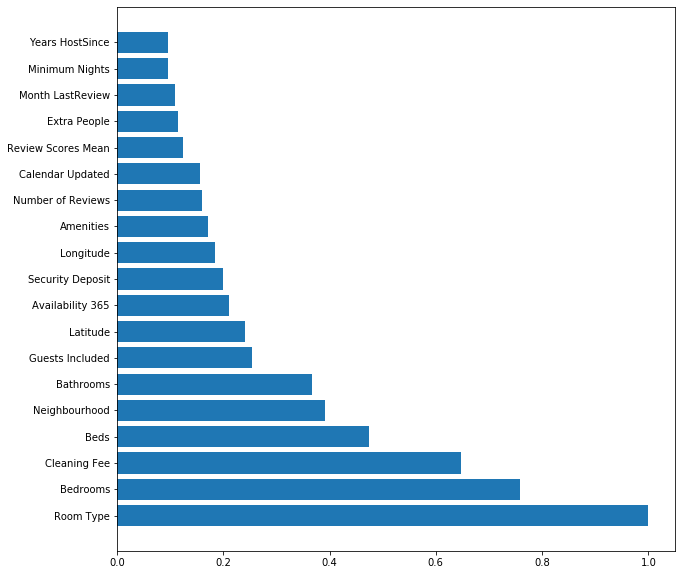

In [177]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances) # NOrmalizar 

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),feature_names[indices])
plt.show()

Las variables con menor peso según importancia y dependencia son:
    
    Bed Type
    Host Response Time
    Property Type (eliminar según Lasso)
    Cancellation Policy
    Maximum Nights (eliminar según Lasso)
    Host Response Rate
    Year LastReview
    Years HostSince
    Host Verifications (eliminar según Lasso)
    Month LastReview
    Minimum Nights
    Extra People
    Review Scores Mean

##### Resultados iniciales

#### Resultados desactivando las variables con coeficiente 0 según Lasso

#### Resultados reduciendo dimensionalidad con las variables menos relevantes según Random Forest

In [181]:
df_train['Price'].describe()

count    9678.000000
mean       62.321347
std        40.826435
min        10.000000
25%        31.000000
50%        52.000000
75%        80.000000
max       250.000000
Name: Price, dtype: float64

In [183]:
df_test['Price'].describe()

count    3244.000000
mean       60.962084
std        40.759610
min         9.000000
25%        30.000000
50%        50.000000
75%        78.250000
max       250.000000
Name: Price, dtype: float64